# Prove ML per tesi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Si parte dal precedente progetto "Elaborazione del segnale EEG con metodi supervisionati per la classificazione dei pazienti di Alzheimer". Si individuano alcuni dei classificaori utilizzati, per eseguerire k-fold cross validation unita alla greadsearchCV per individuare gli iperparametri ottimali con i quali addestrare i classificatori e alla fine eseguire i modelli.

Si esegue l'import delle principali librerie utilizzate per il progetto di machine learning

In [ ]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from scipy.fftpack import fft, ifft, fftfreq,rfft
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, \
    recall_score, \
    accuracy_score, f1_score

# Lets import some modules for basic computation
import time


import pickle

# Some modules for plotting and visualizing
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# And some Machine Learning modules from scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA

## Principali funzioni di utilità

In [ ]:
def tuning_albero_decisione(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_traina=X_train_caso1
       y_traina=y_train_caso1
       X_testa=X_test_caso1
       y_testa=y_test_caso1
    if caso==2:
       X_traina=X_train_caso2
       y_traina=y_train_caso2
       X_testa=X_test_caso2
       y_testa=y_test_caso2
    if caso==3:
       X_traina=X_train_caso3
       y_traina=y_train_caso3  
       X_testa=X_test_caso3
       y_testa=y_test_caso3   
    if caso==4:
       X_traina=X_train_caso4
       y_traina=y_train_caso4   
       X_testa=X_test_caso4
       y_testa=y_test_caso4     

    parametri1 = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10]}

    parametri = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10],
              "min_samples_leaf":[1,2,3],
              "min_samples_split":[1,2,3],
              "min_weight_fraction_leaf":[0,1,2]
              }

    cercap = GridSearchCV(estimator=DecisionTreeClassifier(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    gs = cercap.fit(X_traina, y_traina)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
  
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testa, y_testa))

    y_true, y_pred = y_testa , clf.predict(X_testa)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testa,y_pred))
    matrice=confusion_matrix(y_testa,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)
    #print(classification_report(y_test,y_pred,target_names=target_names))

In [ ]:
def tuning_albero_decisione_CV(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_traina=X_train_caso1
       y_traina=y_train_caso1
       X_testa=X_test_caso1
       y_testa=y_test_caso1
    if caso==2:
       X_traina=X_train_caso2
       y_traina=y_train_caso2
       X_testa=X_test_caso2
       y_testa=y_test_caso2
    if caso==3:
       X_traina=X_train_caso3
       y_traina=y_train_caso3  
       X_testa=X_test_caso3
       y_testa=y_test_caso3   
    if caso==4:
       X_traina=X_train_caso4
       y_traina=y_train_caso4   
       X_testa=X_test_caso4
       y_testa=y_test_caso4 

    parametri1 = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10]}

    parametri = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10],
              "min_samples_leaf":[1,2,3],
              "min_samples_split":[1,2,3],
              "min_weight_fraction_leaf":[0,1,2]}

    cercap = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=2,
                  verbose=1,
                  n_jobs=-1)
    gs = cercap.fit(X_traina, y_traina)
    print(gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
         
    #questa parte non viene eseguita in quanto  è stato già eseguita avendo imnpostato refit=True.
   

    scores = cross_val_score(gs, X_traina, y_traina, 
                         scoring='accuracy', cv=ncv)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

    print('Test accuracy: %.3f' % clf.score(X_testa, y_testa))

In [ ]:
def tuning_SVM(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_trains=X_train_caso1
       y_trains=y_train_caso1
       X_tests=X_test_caso1
       y_tests=y_test_caso1
    if caso==2:
       X_trains=X_train_caso2
       y_trains=y_train_caso2
       X_tests=X_test_caso2
       y_tests=y_test_caso2
    if caso==3:
       X_trains=X_train_caso3
       y_trains=y_train_caso3  
       X_tests=X_test_caso3
       y_tests=y_test_caso3   
    if caso==4:
       X_trains=X_train_caso4
       y_trains=y_train_caso4   
       X_tests=X_test_caso4
       y_tests=y_test_caso4     

    
    #parametri = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
    #           'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
    #           'kernel': ['linear','rbf']}

    parametri1 = {'kernel': ['linear','rbf']}

    #cercap = GridSearchCV(estimator=SVC(), 
    #              param_grid=parametri, 
    #              scoring='accuracy', 
    #              refit=True,
    #              cv=ncv,
    #              verbose=1,
    #              n_jobs=-1)
    cercap = RandomizedSearchCV(estimator=SVC(), 
                  param_distributions=parametri1, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_iter=20,
                  n_jobs=-1)
    gs = cercap.fit(X_trains, y_trains)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    # note that we do not need to refit the classifier
    # because this is done automatically via refit=True.
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_tests, y_tests))

    y_true, y_pred = y_tests , clf.predict(X_tests)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_tests,y_pred))
    matrice=confusion_matrix(y_tests,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)

In [ ]:
def tuning_foresta(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_trainf=X_train_caso1
       y_trainf=y_train_caso1
       X_testf=X_test_caso1
       y_testf=y_test_caso1
    if caso==2:
       X_trainf=X_train_caso2
       y_trainf=y_train_caso2
       X_testf=X_test_caso2
       y_testf=y_test_caso2
    if caso==3:
       X_trainf=X_train_caso3
       y_trainf=y_train_caso3  
       X_testf=X_test_caso3
       y_testf=y_test_caso3   
    if caso==4:
       X_trainf=X_train_caso4
       y_trainf=y_train_caso4   
       X_testf=X_test_caso4
       y_testf=y_test_caso4     

     
    parametri = {"max_depth": [8, 12, None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [1, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [True, False],
                 "criterion": ["gini", "entropy"],
                 "n_estimators": [20, 40, 80]}
  

    #cercap = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
    #              param_grid=parametri, 
    #              scoring='accuracy', 
    #              refit=True,
    #              cv=ncv,
    #              verbose=1,
    #              n_jobs=-1)
    cercap = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), 
                  param_distributions=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_iter=20,
                  n_jobs=-1)
    
   
    gs = cercap.fit(X_trainf, y_trainf)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testf, y_testf))

    y_true, y_pred = y_testf , clf.predict(X_testf)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testf,y_pred))
    matrice=confusion_matrix(y_testf,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)


In [ ]:
def tuning_SVM_CV(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_train=X_train_caso1
       y_train=y_train_caso1
       X_test=X_test_caso1
       y_test=y_test_caso1
    if caso==2:
       X_train=X_train_caso2
       y_train=y_train_caso2
       X_test=X_test_caso2
       y_test=y_test_caso2
    if caso==3:
       X_train=X_train_caso3
       y_train=y_train_caso3  
       X_test=X_test_caso3
       y_test=y_test_caso3   
    if caso==4:
       X_train=X_train_caso4
       y_train=y_train_caso4   
       X_test=X_test_caso4
       y_test=y_test_caso4 

    range_valori = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    parametri = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'kernel': ['linear','rbf']}

  

    cercap = GridSearchCV(estimator=SVC(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=2,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_train, y_train)
    print(gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    

    scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=ncv)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione:: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

    print('Accuratezza con dati di Test: %.3f' % clf.score(X_test, y_test))

In [ ]:
def tuning_KNN(caso,numerocv):
    ncv=numerocv

    if caso==1:
       X_traink=X_train_caso1
       y_traink=y_train_caso1
       X_testk=X_test_caso1
       y_testk=y_test_caso1
    if caso==2:
       X_traink=X_train_caso2
       y_traink=y_train_caso2
       X_testk=X_test_caso2
       y_testk=y_test_caso2
    if caso==3:
       X_traink=X_train_caso3
       y_traink=y_train_caso3  
       X_testk=X_test_caso3
       y_testk=y_test_caso3   
    if caso==4:
       X_traink=X_train_caso4
       y_traink=y_train_caso4   
       X_testk=X_test_caso4
       y_testk=y_test_caso4     

    parametri = {
             'n_neighbors' : [5, 20],
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
              }

    cercap = GridSearchCV(estimator=KNeighborsClassifier(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_traink, y_traink)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testk, y_testk))

    y_true, y_pred = y_testk , clf.predict(X_testk)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testk,y_pred))
    matrice=confusion_matrix(y_testk,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)

In [ ]:
def tuning_MP(caso,numerocv):
    ncv=numerocv

    if caso==1:
       X_trainm=X_train_caso1
       y_trainm=y_train_caso1
       X_testm=X_test_caso1
       y_testm=y_test_caso1
    if caso==2:
       X_trainm=X_train_caso2
       y_trainm=y_train_caso2
       X_testm=X_test_caso2
       y_testm=y_test_caso2
    if caso==3:
       X_trainm=X_train_caso3
       y_trainm=y_train_caso3  
       X_testm=X_test_caso3
       y_testm=y_test_caso3   
    if caso==4:
       X_trainm=X_train_caso4
       y_trainm=y_train_caso4   
       X_testm=X_test_caso4
       y_testm=y_test_caso4     

    parametri = {  'hidden_layer_sizes': [(10,30,10),(20,)],
                    'activation': ['tanh', 'relu'],
                    'solver': ['sgd', 'adam'],
                    'alpha': [0.0001, 0.05, 0.1,1],
                    'learning_rate': ['constant','adaptive']
                  }

    cercap = GridSearchCV(estimator=MLPClassifier(max_iter=100), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_trainm, y_trainm)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print('I migliori parametri trvati sono :\n', gs.best_params_)
    #print(gs.best_params_)

    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    #    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    
    
    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testm, y_testm))

    y_true, y_pred = y_testm , clf.predict(X_testm)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testm,y_pred))
    matrice=confusion_matrix(y_testm,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)

In [ ]:
def tuning_LR(caso,numerocv):
    ncv=numerocv

    if caso==1:
       X_trainl=X_train_caso1
       y_trainl=y_train_caso1
       X_testl=X_test_caso1
       y_testl=y_test_caso1
    if caso==2:
       X_trainl=X_train_caso2
       y_trainl=y_train_caso2
       X_testl=X_test_caso2
       y_testl=y_test_caso2
    if caso==3:
       X_trainl=X_train_caso3
       y_trainl=y_train_caso3  
       X_testl=X_test_caso3
       y_testl=y_test_caso3   
    if caso==4:
       X_trainl=X_train_caso4
       y_trainl=y_train_caso4   
       X_testl=X_test_caso4
       y_testl=y_test_caso4     

    
    parametri ={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

    cercap = GridSearchCV(estimator=LogisticRegression(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_trainl, y_trainl)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print('I migliori parametri trvati sono :\n', gs.best_params_)
    #print(gs.best_params_)

    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    #    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    
    
    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testl, y_testl))

    y_true, y_pred = y_testl , clf.predict(X_testl)
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testl,y_pred))
    matrice=confusion_matrix(y_testl,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    if (fp== 0 and fp==0):
        precision=0
    else:
        precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)

In [ ]:
def validazione_incrociata_kfold(caso,numerocv,modello):
    ncv=numerocv
    if modello==1:
       classificatore=DecisionTreeClassifier()
    if modello==2:
       classificatore=SVC()
       

    if caso==1:
       X_train=X_train_caso1
       y_train=y_train_caso1
       X_test=X_test_caso1
       y_test=y_test_caso1
    if caso==2:
       X_train=X_train_caso2
       y_train=y_train_caso2
       X_test=X_test_caso2
       y_test=y_test_caso2
    if caso==3:
       X_train=X_train_caso3
       y_train=y_train_caso3  
       X_test=X_test_caso3
       y_test=y_test_caso3   
    if caso==4:
       X_train=X_train_caso4
       y_train=y_train_caso4   
       X_test=X_test_caso4
       y_test=y_test_caso4     

    from sklearn.model_selection import StratifiedKFold
    

    kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

    scores = []
    for k, (train, test) in enumerate(kfold):
        classificatore.fit(X_train[train], y_train[train])
        score = classificatore.score(X_train[test], y_train[test])
        scores.append(score)
        print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
              np.bincount(y_train[train]), score))
    
    print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:

def validazione_incrociata_score(caso,numerocv,modello):
    ncv=numerocv
    if modello==1:
       classificatore=DecisionTreeClassifier()
    if modello==2:
       classificatore=SVC()
       

    if caso==1:
       X_train=X_train_caso1
       y_train=y_train_caso1
       X_test=X_test_caso1
       y_test=y_test_caso1
    if caso==2:
       X_train=X_train_caso2
       y_train=y_train_caso2
       X_test=X_test_caso2
       y_test=y_test_caso2
    if caso==3:
       X_train=X_train_caso3
       y_train=y_train_caso3  
       X_test=X_test_caso3
       y_test=y_test_caso3   
    if caso==4:
       X_train=X_train_caso4
       y_train=y_train_caso4   
       X_test=X_test_caso4
       y_test=y_test_caso4     

    
    scores = cross_val_score(estimator=classificatore,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             n_jobs=1)
    print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
def prepara_dati(caso,pca,split):
    
    
       

    if caso==1:
       df=pca_wa_AD_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_AD_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Control', 1, 0)

    if caso==2:
       df=pca_wa_MCI_AD.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_AD[' class']
       y = Y.to_numpy()
       y = np.where(y == ' AD', 1, 0)
       X_train=X_train_caso2
       y_train=y_train_caso2
       X_test=X_test_caso2
       y_test=y_test_caso2
    if caso==3:
       df=pca_wa_MCI_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' MCI', 1, 0)
       X_train=X_train_caso3
       y_train=y_train_caso3  
       X_test=X_test_caso3
       y_test=y_test_caso3   
    if caso==4:
       df=pca_wa_CASE_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_CASE_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Case', 1, 0)
       X_train=X_train_caso4
       y_train=y_train_caso4   
       X_test=X_test_caso4
       y_test=y_test_caso4     

    
   
    
    pipe_cl = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        classificatore)

    pipe_cl.fit(X_train, y_train)
    y_pred = pipe_cl.predict(X_test)
    print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

In [ ]:

def exec_trad(caso,modello):
    
    if modello==1:
       classificatore=DecisionTreeClassifier(criterion='gini', max_depth=3)
    if modello==2:
       classificatore=SVC()
       
    if caso==1:
       df=pca_wa_AD_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_AD_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Control', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
    if caso==2:
       df=pca_wa_MCI_AD.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_AD[' class']
       y = Y.to_numpy()
       y = np.where(y == ' AD', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
      
    if caso==3:
       df=pca_wa_MCI_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' MCI', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
         
    if caso==4:
       df=pca_wa_CASE_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_CASE_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Case', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
           

    
      
    classificatore.fit(X_train, y_train)
        
    train_score = int((classificatore.score(X_train, y_train))*100)
    test_score = int((classificatore.score(X_test, y_test))*100)
    y_pred = classificatore.predict(X_test)
    test_accurancy=int((accuracy_score(y_test, y_pred))*100)
    print("accurancy test :", test_accurancy)

In [ ]:

def prova_pipeline(caso,modello):
    
    if modello==1:
       classificatore=tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
    if modello==2:
       classificatore=SVC()
       
    if caso==1:
       df=pca_wa_AD_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_AD_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Control', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
    if caso==2:
       df=pca_wa_MCI_AD.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_AD[' class']
       y = Y.to_numpy()
       y = np.where(y == ' AD', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
      
    if caso==3:
       df=pca_wa_MCI_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' MCI', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
         
    if caso==4:
       df=pca_wa_CASE_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_CASE_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Case', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
           

    
   
    
    pipe_cl = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        classificatore)

    pipe_cl.fit(X_train, y_train)
    y_pred = pipe_cl.predict(X_test)
    print('Test Accuracy: %.3f' % pipe_cl.score(X_test, y_test))

## Preparazione dei dati con altr frequenza di taglio (da 1 a 8 hz)

In [ ]:
hz1=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_1_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz2=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_2_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz3=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_3_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz4=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_4_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz5=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_5_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz6=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_6_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz8=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_8_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz9=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_9_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz10=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_10_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz11=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_11_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz12=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_12_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz13=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_13_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz14=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_14_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz15=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_15_Avg_PxxAdMciHc_2.txt",sep="|",header=None)
hz16=pd.read_csv("/content/drive/MyDrive/Dati EEG/frequenze/Freq_16_Avg_PxxAdMciHc_2.txt",sep="|",header=None)




## Valutazione modello con altre frequenza di taglio (da 1 a 8 hz)

### 1 hz

In [ ]:

y1=hz1.loc[:,0].to_numpy()
y2=hz1.loc[:,1].to_numpy()
y3=hz1.loc[:,2].to_numpy()



In [ ]:
y1,y2,y3,hz1

(array([ 69511.39933644, 105757.34528029,  62207.37792689, 104996.07706748,
         76429.52733412,  78796.62831736,  53533.79247454,  40626.99275502,
         68179.64353836,  67466.112359  ,  69668.40863297,  77656.84768359,
        390724.15961142,  83323.91383037, 110885.02906494,  89837.86529047,
         91959.85586134,  92650.37956277,  71115.79917129]),
 array([ 26656.99930603,  17179.08519968,  12382.04235719,  32686.0958938 ,
         24746.32454088,  28920.80009917,  30704.80211995,  54195.16408546,
         22500.72730452,  14346.25835511,  26143.372509  ,  25769.69480937,
         16945.29297037,  57707.12750294,  17466.04741557,  25519.76227995,
        210704.46977622, 264340.66216905,  34391.0943176 ]),
 array([11271.68575552, 13568.35009691,  5337.80593778,  2234.40149129,
         1432.08462939, 17088.91498177,  6565.64485098,  3421.72725158,
        49866.21640109,  5682.47534629,  1618.40279488, 13027.79349669,
         9521.37499171,  5024.40388126,  1828.09006613

In [ ]:
x1 = np.linspace(0, 19, len(y1), endpoint=True)
x2 = np.linspace(0, 19,len(y2), endpoint=True)
x3 = np.linspace(0, 19,len(y3), endpoint=True)

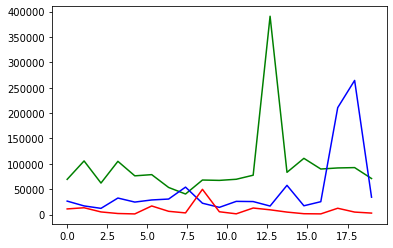

In [ ]:
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'b')
plt.plot(x3, y3, 'r')
#plt.ylim(0,300000)
plt.show()

In [ ]:
matriceAD = np.zeros((len(y1),2))
matriceMCI = np.zeros((len(y2),2))
matriceHC = np.zeros((len(y3),2))


In [ ]:
matriceADHC = np.zeros((len(y1)+len(y3),2))
matriceMCIHC = np.zeros((len(y2)+len(y3),2))
matriceADMCI = np.zeros((len(y1)+len(y2),2))
matriceCASEHC = np.zeros((len(y2)+len(y3)+len(y1),2))

In [ ]:
for i in range(len(y1)):
      matriceAD[i,0]=y1[i]
      matriceAD[i,1]=1

In [ ]:
for i in range(len(y2)):
      matriceMCI[i,0]=y2[i]
      matriceMCI[i,1]=2

In [ ]:
for i in range(len(y3)):
      matriceHC[i,0]=y3[i]
      matriceHC[i,1]=3

In [ ]:
AD=pd.DataFrame(matriceAD)
HC=pd.DataFrame(matriceHC)
MCI=pd.DataFrame(matriceMCI)

In [ ]:
ADHC=AD.copy()
ADHC=ADHC.append(HC,ignore_index=True)

In [ ]:
ADMCI=AD.copy()
ADMCI=ADMCI.append(MCI,ignore_index=True)

In [ ]:
MCIHC=MCI.copy()
MCIHC=MCIHC.append(HC,ignore_index=True)

In [ ]:
CASEHC=AD.copy()
CASEHC=CASEHC.append(MCI,ignore_index=True)
CASEHC=CASEHC.append(HC,ignore_index=True)

#### Caso1 AD vs HCF

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()

In [ ]:
y = np.where(y == 1, 1, 0)

In [ ]:
X,y

(array([ 69511.39933644, 105757.34528029,  62207.37792689, 104996.07706748,
         76429.52733412,  78796.62831736,  53533.79247454,  40626.99275502,
         68179.64353836,  67466.112359  ,  69668.40863297,  77656.84768359,
        390724.15961142,  83323.91383037, 110885.02906494,  89837.86529047,
         91959.85586134,  92650.37956277,  71115.79917129,  11271.68575552,
         13568.35009691,   5337.80593778,   2234.40149129,   1432.08462939,
         17088.91498177,   6565.64485098,   3421.72725158,  49866.21640109,
          5682.47534629,   1618.40279488,  13027.79349669,   9521.37499171,
          5024.40388126,   1828.09006613,   1492.82678392,  12591.3431141 ,
          5054.35389429,   3061.40677282]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso1=X_train
X_test_caso1=X_test
y_train_caso1=y_train
y_test_caso1=y_test



In [ ]:
X_train_caso1=X_train_caso1.reshape(-1,1)
X_test_caso1=X_test_caso1.reshape(-1,1)
y_train_caso1=y_train_caso1.reshape(-1,1)
y_test_caso1=y_test_caso1.reshape(-1,1)


In [ ]:
tuning_albero_decisione(1,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    2.9s finished


In [ ]:
tuning_SVM(1,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    8.5s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


In [ ]:
#tuning_foresta(1,10)

In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
#tuning_SVM_CV(1,10)

In [ ]:
#validazione_incrociata_kfold(1,10,1)

In [ ]:
#validazione_incrociata_kfold(1,10,2)

In [ ]:
#validazione_incrociata_score(1,10,1)

In [ ]:
#validazione_incrociata_score(1,10,2)

In [ ]:
#prova_pipeline(1,2)

In [ ]:
tuning_KNN(1,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(1,5)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.3s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.580
I migliori parametri trvati sono :
 {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    7.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
tuning_LR(1,5)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.567
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[0 6]
 [0 6]]
Accuratezza Test: 50.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_foresta(1,5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'n_estimators': 40, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 1, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



#### Caso2 AD vs MCI

In [ ]:

df=ADMCI.loc[:,0]

X = df.to_numpy()

Y = ADMCI.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=5)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso2=X_train
X_test_caso2=X_test
y_train_caso2=y_train
y_test_caso2=y_test

In [ ]:
X_train_caso2=X_train_caso2.reshape(-1,1)
X_test_caso2=X_test_caso2.reshape(-1,1)
y_train_caso2=y_train_caso2.reshape(-1,1)
y_test_caso2=y_test_caso2.reshape(-1,1)

In [ ]:
tuning_albero_decisione(2,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.820
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12

[[5 1]
 [1 5]]
Accuratezza Test: 83.000
Precisione  Test: 83.000
Sensitività Test: 83.000
Specificità Test: 83.000
F1 score    Test: 83.000


[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.5s finished


In [ ]:
tuning_SVM(2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.860
{'kernel': 'rbf'}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12

[[5 1]
 [1 5]]
Accuratezza Test: 83.000
Precisione  Test: 83.000
Sensitività Test: 83.000
Specificità Test: 83.000
F1 score    Test: 83.000


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(2,10)

In [ ]:
#tuning_albero_decisione_CV(2,10)

In [ ]:
#tuning_SVM_CV(2,10)

In [ ]:
#validazione_incrociata_kfold(2,10,1)

In [ ]:
#validazione_incrociata_kfold(2,10,2)

In [ ]:
#validazione_incrociata_score(2,10,1)

In [ ]:
#validazione_incrociata_score(2,10,2)

In [ ]:
#prova_pipeline(2,2)

In [ ]:
#exec_trad(2,1)

In [ ]:
#exec_trad(2,2)

In [ ]:
tuning_KNN(2,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.860
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[5 1]
 [0 6]]
Accuratezza Test: 91.000
Precisione  Test: 100.000
Sensitività Test: 83.000
Specificità Test: 100.000
F1 score    Test: 90.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(2,10)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    8.5s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.567
I migliori parametri trvati sono :
 {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[0 6]
 [0 6]]


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   15.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning:

invalid value encountered in long_scalars



ValueError: ignored

In [ ]:
tuning_LR(2,5)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.500
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[0 6]
 [0 6]]
Accuratezza Test: 50.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<br>
<br>

<br>
<br>

In [ ]:
#tuning_foresta(2,10)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    5.3s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.617
{'n_estimators': 80, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': False}
Accuratezza con dati di Test: 0.423
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.25      0.18      0.21        11
           1       0.50      0.60      0.55        15

    accuracy                           0.42        26
   macro avg       0.38      0.39      0.38        26
weighted avg       0.39      0.42      0.40        26

[[2 9]
 [6 9]]
Accuratezza Test: 42.000
Precisione  Test: 25.000
Sensitività Test: 18.000
Specificità Test: 60.000
F1 score    Test: 20.000


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.1s finished


#### Caso3 MCI vs HCF

In [ ]:

df=MCIHC.loc[:,0]

X = df.to_numpy()

Y = MCIHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 2, 1, 0)

#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso3=X_train
X_test_caso3=X_test
y_train_caso3=y_train
y_test_caso3=y_test

In [ ]:
X_train_caso3=X_train_caso3.reshape(-1,1)
X_test_caso3=X_test_caso3.reshape(-1,1)
y_train_caso3=y_train_caso3.reshape(-1,1)
y_test_caso3=y_test_caso3.reshape(-1,1)

In [ ]:
tuning_albero_decisione(3,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.847
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

[[6 0]
 [3 3]]
Accuratezza Test: 75.000
Precisione  Test: 66.000
Sensitività Test: 100.000
Specificità Test: 50.000
F1 score    Test: 79.000


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.4s finished


In [ ]:
tuning_SVM(3,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  2.7min remaining:  1.2min


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.847
{'kernel': 'rbf'}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

[[6 0]
 [3 3]]
Accuratezza Test: 75.000
Precisione  Test: 66.000
Sensitività Test: 100.000
Specificità Test: 50.000
F1 score    Test: 79.000


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.9min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_albero_decisione_CV(3,10)

In [ ]:
#tuning_SVM_CV(3,10)

In [ ]:
#validazione_incrociata_kfold(3,10,1)

In [ ]:
#validazione_incrociata_kfold(3,10,2)

In [ ]:
#validazione_incrociata_score(3,10,1)

In [ ]:
#validazione_incrociata_score(3,10,2)

In [ ]:
#prova_pipeline(3,2)

In [ ]:
#exec_trad(3,1)

In [ ]:
#exec_trad(3,2)

In [ ]:
tuning_KNN(3,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.887
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

[[6 0]
 [3 3]]
Accuratezza Test: 75.000
Precisione  Test: 66.000
Sensitività Test: 100.000
Specificità Test: 50.000
F1 score    Test: 79.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(3,10)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   16.4s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.740
I migliori parametri trvati sono :
 {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.33      0.29      0.31         7
           1       0.58      0.64      0.61        11

    accuracy                           0.50        18
   macro avg       0.46      0.46      0.46        18
weighted avg       0.49      0.50      0.49        18

[[2 5]
 [4 7]]
Accuratezza Test: 50.000
Precisione  Test: 33.000
Sensitività Test: 28.000
Specificità Test: 63.000
F1 score    Test: 30.000


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   26.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



In [ ]:
tuning_LR(3,5)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.727
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[0 6]
 [0 6]]
Accuratezza Test: 50.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_foresta(3,10)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.4s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.595
{'n_estimators': 40, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 1, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Accuratezza con dati di Test: 0.611
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      1.00      0.76        11

    accuracy                           0.61        18
   macro avg       0.31      0.50      0.38        18
weighted avg       0.37      0.61      0.46        18

[[ 0  7]
 [ 0 11]]


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning:

invalid value encountered in long_scalars



ValueError: ignored

#### Caso4 CASE vs HCF

In [ ]:
df=CASEHC.loc[:,0]

X = df.to_numpy()

Y = CASEHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso4=X_train
X_test_caso4=X_test
y_train_caso4=y_train
y_test_caso4=y_test

In [ ]:
X_train_caso4=X_train_caso4.reshape(-1,1)
X_test_caso4=X_test_caso4.reshape(-1,1)
y_train_caso4=y_train_caso4.reshape(-1,1)
y_test_caso4=y_test_caso4.reshape(-1,1)

In [ ]:
tuning_albero_decisione(4,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.925
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.778
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.62      0.83      0.71         6

    accuracy                           0.78        18
   macro avg       0.76      0.79      0.77        18
weighted avg       0.81      0.78      0.78        18

[[9 3]
 [1 5]]
Accuratezza Test: 77.000
Precisione  Test: 90.000
Sensitività Test: 75.000
Specificità Test: 83.000
F1 score    Test: 81.000


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.4s finished


In [ ]:
tuning_SVM(4,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.925
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.778
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.62      0.83      0.71         6

    accuracy                           0.78        18
   macro avg       0.76      0.79      0.77        18
weighted avg       0.81      0.78      0.78        18

[[9 3]
 [1 5]]
Accuratezza Test: 77.000
Precisione  Test: 90.000
Sensitività Test: 75.000
Specificità Test: 83.000
F1 score    Test: 81.000


In [ ]:
#tuning_albero_decisione_CV(4,10)

In [ ]:
#tuning_SVM_CV(4,10)

In [ ]:
#validazione_incrociata_kfold(4,10,1)

In [ ]:
#validazione_incrociata_kfold(4,10,2)

In [ ]:
#validazione_incrociata_score(4,10,1)

In [ ]:
#validazione_incrociata_score(4,10,2)

In [ ]:
#prova_pipeline(4,2)

In [ ]:
#exec_trad(4,1)

In [ ]:
#exec_trad(4,2)

In [ ]:
tuning_KNN(4,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.950
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.778
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.62      0.83      0.71         6

    accuracy                           0.78        18
   macro avg       0.76      0.79      0.77        18
weighted avg       0.81      0.78      0.78        18

[[9 3]
 [1 5]]
Accuratezza Test: 77.000
Precisione  Test: 90.000
Sensitività Test: 75.000
Specificità Test: 83.000
F1 score    Test: 81.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(4,10)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   16.9s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.820
I migliori parametri trvati sono :
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
Accuratezza con dati di Test: 0.758
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.78      0.96      0.86        26

    accuracy                           0.76        33
   macro avg       0.39      0.48      0.43        33
weighted avg       0.62      0.76      0.68        33

[[ 0  7]
 [ 1 25]]
Accuratezza Test: 75.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 96.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   27.1s finished


In [ ]:
tuning_LR(4,5)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.843
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.889
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.83      0.83      0.83         6

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18

[[11  1]
 [ 1  5]]
Accuratezza Test: 88.000
Precisione  Test: 91.000
Sensitività Test: 91.000
Specificità Test: 83.000
F1 score    Test: 91.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(4,10)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.6s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.673
{'n_estimators': 40, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 1, 'max_depth': 12, 'criterion': 'gini', 'bootstrap': False}
Accuratezza con dati di Test: 0.727
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.77      0.92      0.84        26

    accuracy                           0.73        33
   macro avg       0.39      0.46      0.42        33
weighted avg       0.61      0.73      0.66        33

[[ 0  7]
 [ 2 24]]
Accuratezza Test: 72.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 92.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.3s finished


<br>
<br>

### 2 hz

In [ ]:

y1=hz2.loc[:,0].to_numpy()
y2=hz2.loc[:,1].to_numpy()
y3=hz2.loc[:,2].to_numpy()



In [ ]:
y1,y2,y3,hz2

(array([ 26426.78539415,  13869.91318326,  22446.20039679,  63950.29185487,
         31537.98079601,  31130.55996601,  28025.54710119,  12353.53125113,
         15973.93913271,  24770.09685874,  31648.87997432,  26622.05088163,
        296896.23883423,  36568.44382741,  40856.98724407,  24671.74015177,
         51208.52829398,  33618.74101188,  31726.57059637]),
 array([  9041.39279091,   6912.43789668,   5234.99493444,  21506.19514454,
         26174.56219764,  12279.73509002,  18927.10137509,  34132.08142086,
         11077.11869163,   6197.99072717,  12673.50903248,   9746.07235865,
          7492.39228193,  11765.31439852,   9251.52687683,  17383.61716389,
        143252.87274653, 133341.52924602,  21503.91171693]),
 array([ 5704.38756293,  8257.5595305 ,  3551.70122151,  1256.49081804,
          784.61156093, 11068.9136488 ,  3997.83955983,  1829.38444123,
        31994.65418675,  3695.58795688,   815.87391549,  6651.98229692,
         6161.1081621 ,  3296.30585711,   974.3722764 

In [ ]:
x1 = np.linspace(0, 19, len(y1), endpoint=True)
x2 = np.linspace(0, 19,len(y2), endpoint=True)
x3 = np.linspace(0, 19,len(y3), endpoint=True)

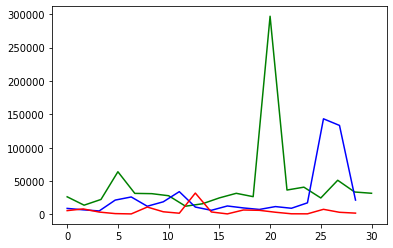

In [ ]:
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'b')
plt.plot(x3, y3, 'r')
#plt.ylim(0,300000)
plt.show()

In [ ]:
matriceAD = np.zeros((len(y1),2))
matriceMCI = np.zeros((len(y2),2))
matriceHC = np.zeros((len(y3),2))


In [ ]:
matriceADHC = np.zeros((len(y1)+len(y3),2))
matriceMCIHC = np.zeros((len(y2)+len(y3),2))
matriceADMCI = np.zeros((len(y1)+len(y2),2))
matriceCASEHC = np.zeros((len(y2)+len(y3)+len(y1),2))

In [ ]:
for i in range(len(y1)):
      matriceAD[i,0]=y1[i]
      matriceAD[i,1]=1

In [ ]:
for i in range(len(y2)):
      matriceMCI[i,0]=y2[i]
      matriceMCI[i,1]=2

In [ ]:
for i in range(len(y3)):
      matriceHC[i,0]=y3[i]
      matriceHC[i,1]=3

In [ ]:
AD=pd.DataFrame(matriceAD)
HC=pd.DataFrame(matriceHC)
MCI=pd.DataFrame(matriceMCI)

In [ ]:
ADHC=AD.copy()
ADHC=ADHC.append(HC,ignore_index=True)

In [ ]:
ADMCI=AD.copy()
ADMCI=ADMCI.append(MCI,ignore_index=True)

In [ ]:
MCIHC=MCI.copy()
MCIHC=MCIHC.append(HC,ignore_index=True)

In [ ]:
CASEHC=AD.copy()
CASEHC=CASEHC.append(MCI,ignore_index=True)
CASEHC=CASEHC.append(HC,ignore_index=True)

#### Caso1 AD vs HCF

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()

In [ ]:
y = np.where(y == 1, 1, 0)

In [ ]:
X,y

(array([ 26426.78539415,  13869.91318326,  22446.20039679,  63950.29185487,
         31537.98079601,  31130.55996601,  28025.54710119,  12353.53125113,
         15973.93913271,  24770.09685874,  31648.87997432,  26622.05088163,
        296896.23883423,  36568.44382741,  40856.98724407,  24671.74015177,
         51208.52829398,  33618.74101188,  31726.57059637,   5704.38756293,
          8257.5595305 ,   3551.70122151,   1256.49081804,    784.61156093,
         11068.9136488 ,   3997.83955983,   1829.38444123,  31994.65418675,
          3695.58795688,    815.87391549,   6651.98229692,   6161.1081621 ,
          3296.30585711,    974.3722764 ,    896.35577261,   7672.94361881,
          3217.28328165,   1965.09751075]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso1=X_train
X_test_caso1=X_test
y_train_caso1=y_train
y_test_caso1=y_test



In [ ]:
X_train_caso1=X_train_caso1.reshape(-1,1)
X_test_caso1=X_test_caso1.reshape(-1,1)
y_train_caso1=y_train_caso1.reshape(-1,1)
y_test_caso1=y_test_caso1.reshape(-1,1)


In [ ]:
tuning_albero_decisione(1,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.893
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.4s finished


In [ ]:
tuning_SVM(1,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   35.7s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   45.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.893
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


In [ ]:
#tuning_foresta(1,10)

In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
#tuning_SVM_CV(1,10)

In [ ]:
#validazione_incrociata_kfold(1,10,1)

In [ ]:
#validazione_incrociata_kfold(1,10,2)

In [ ]:
#validazione_incrociata_score(1,10,1)

In [ ]:
#validazione_incrociata_score(1,10,2)

In [ ]:
#prova_pipeline(1,2)

In [ ]:
tuning_KNN(1,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.893
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(1,5)

In [ ]:
tuning_LR(1,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.773
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(1,5)

#### Caso2 AD vs MCI

In [ ]:

df=ADMCI.loc[:,0]

X = df.to_numpy()

Y = ADMCI.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=5)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso2=X_train
X_test_caso2=X_test
y_train_caso2=y_train
y_test_caso2=y_test

In [ ]:
X_train_caso2=X_train_caso2.reshape(-1,1)
X_test_caso2=X_test_caso2.reshape(-1,1)
y_train_caso2=y_train_caso2.reshape(-1,1)
y_test_caso2=y_test_caso2.reshape(-1,1)

In [ ]:
tuning_albero_decisione(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.740
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

[[4 2]
 [2 4]]
Accuratezza Test: 66.000
Precisione  Test: 66.000
Sensitività Test: 66.000
Specificità Test: 66.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.4s finished


In [ ]:
tuning_SVM(2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.740
{'kernel': 'rbf'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

[[4 2]
 [2 4]]
Accuratezza Test: 66.000
Precisione  Test: 66.000
Sensitività Test: 66.000
Specificità Test: 66.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(2,10)

In [ ]:
#tuning_albero_decisione_CV(2,10)

In [ ]:
#tuning_SVM_CV(2,10)

In [ ]:
#validazione_incrociata_kfold(2,10,1)

In [ ]:
#validazione_incrociata_kfold(2,10,2)

In [ ]:
#validazione_incrociata_score(2,10,1)

In [ ]:
#validazione_incrociata_score(2,10,2)

In [ ]:
#prova_pipeline(2,2)

In [ ]:
#exec_trad(2,1)

In [ ]:
#exec_trad(2,2)

In [ ]:
tuning_KNN(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.740
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

[[4 2]
 [2 4]]
Accuratezza Test: 66.000
Precisione  Test: 66.000
Sensitività Test: 66.000
Specificità Test: 66.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(2,10)

In [ ]:
tuning_LR(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.500
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[0 6]
 [0 6]]
Accuratezza Test: 50.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<br>
<br>

<br>
<br>

In [ ]:
#tuning_foresta(2,10)

#### Caso3 MCI vs HCF

In [ ]:

df=MCIHC.loc[:,0]

X = df.to_numpy()

Y = MCIHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 2, 1, 0)

#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso3=X_train
X_test_caso3=X_test
y_train_caso3=y_train
y_test_caso3=y_test

In [ ]:
X_train_caso3=X_train_caso3.reshape(-1,1)
X_test_caso3=X_test_caso3.reshape(-1,1)
y_train_caso3=y_train_caso3.reshape(-1,1)
y_test_caso3=y_test_caso3.reshape(-1,1)

In [ ]:
tuning_albero_decisione(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.817
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      0.17      0.29         6

    accuracy                           0.58        12
   macro avg       0.77      0.58      0.50        12
weighted avg       0.77      0.58      0.50        12

[[6 0]
 [5 1]]
Accuratezza Test: 58.000
Precisione  Test: 54.000
Sensitività Test: 100.000
Specificità Test: 16.000
F1 score    Test: 70.000


[Parallel(n_jobs=-1)]: Done 1951 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.8s finished


In [ ]:
tuning_SVM(3,10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.783
{'kernel': 'rbf'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.0min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_albero_decisione_CV(3,10)

In [ ]:
#tuning_SVM_CV(3,10)

In [ ]:
#validazione_incrociata_kfold(3,10,1)

In [ ]:
#validazione_incrociata_kfold(3,10,2)

In [ ]:
#validazione_incrociata_score(3,10,1)

In [ ]:
#validazione_incrociata_score(3,10,2)

In [ ]:
#prova_pipeline(3,2)

In [ ]:
#exec_trad(3,1)

In [ ]:
#exec_trad(3,2)

In [ ]:
tuning_KNN(3,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.847
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.33      0.50         6

    accuracy                           0.67        12
   macro avg       0.80      0.67      0.62        12
weighted avg       0.80      0.67      0.62        12

[[6 0]
 [4 2]]
Accuratezza Test: 66.000
Precisione  Test: 60.000
Sensitività Test: 100.000
Specificità Test: 33.000
F1 score    Test: 75.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(3,10)

In [ ]:
tuning_LR(3,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.567
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[0 6]
 [0 6]]
Accuratezza Test: 50.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  67 out of  70 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_foresta(3,10)

#### Caso4 CASE vs HCF

In [ ]:
df=CASEHC.loc[:,0]

X = df.to_numpy()

Y = CASEHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso4=X_train
X_test_caso4=X_test
y_train_caso4=y_train
y_test_caso4=y_test

In [ ]:
X_train_caso4=X_train_caso4.reshape(-1,1)
X_test_caso4=X_test_caso4.reshape(-1,1)
y_train_caso4=y_train_caso4.reshape(-1,1)
y_test_caso4=y_test_caso4.reshape(-1,1)

In [ ]:
tuning_albero_decisione(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.925
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.778
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.62      0.83      0.71         6

    accuracy                           0.78        18
   macro avg       0.76      0.79      0.77        18
weighted avg       0.81      0.78      0.78        18

[[9 3]
 [1 5]]
Accuratezza Test: 77.000
Precisione  Test: 90.000
Sensitività Test: 75.000
Specificità Test: 83.000
F1 score    Test: 81.000


[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.4s finished


In [ ]:
tuning_SVM(4,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.950
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.80      0.67      0.73         6

    accuracy                           0.83        18
   macro avg       0.82      0.79      0.80        18
weighted avg       0.83      0.83      0.83        18

[[11  1]
 [ 2  4]]
Accuratezza Test: 83.000
Precisione  Test: 84.000
Sensitività Test: 91.000
Specificità Test: 66.000
F1 score    Test: 87.000


In [ ]:
#tuning_albero_decisione_CV(4,10)

In [ ]:
#tuning_SVM_CV(4,10)

In [ ]:
#validazione_incrociata_kfold(4,10,1)

In [ ]:
#validazione_incrociata_kfold(4,10,2)

In [ ]:
#validazione_incrociata_score(4,10,1)

In [ ]:
#validazione_incrociata_score(4,10,2)

In [ ]:
#prova_pipeline(4,2)

In [ ]:
#exec_trad(4,1)

In [ ]:
#exec_trad(4,2)

In [ ]:
tuning_KNN(4,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.925
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 0.722
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.57      0.67      0.62         6

    accuracy                           0.72        18
   macro avg       0.69      0.71      0.70        18
weighted avg       0.74      0.72      0.73        18

[[9 3]
 [2 4]]
Accuratezza Test: 72.000
Precisione  Test: 81.000
Sensitività Test: 75.000
Specificità Test: 66.000
F1 score    Test: 77.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(4,10)

In [ ]:
tuning_LR(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.925
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.722
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.57      0.67      0.62         6

    accuracy                           0.72        18
   macro avg       0.69      0.71      0.70        18
weighted avg       0.74      0.72      0.73        18

[[9 3]
 [2 4]]
Accuratezza Test: 72.000
Precisione  Test: 81.000
Sensitività Test: 75.000
Specificità Test: 66.000
F1 score    Test: 77.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(4,10)

<br>
<br>

### 3 hz

In [ ]:

y1=hz3.loc[:,0].to_numpy()
y2=hz3.loc[:,1].to_numpy()
y3=hz3.loc[:,2].to_numpy()



In [ ]:
y1,y2,y3,hz3

(array([ 11941.87873848,  21550.00190442,   7954.53323449,  42676.08920607,
         12148.52499844,  12297.44206568,  19050.99566514,   4992.63032391,
         16011.53399227,   9151.56994628,  14843.20181831,  10445.07001644,
        182700.81680301,  15954.13977107,  11744.1096727 ,   7023.7075574 ,
         37297.83935963,  11622.94020792,  14182.83836805]),
 array([  4543.07919863,   3171.54341213,   2502.25057178,  17653.02373685,
         27477.27413088,   3811.75103388,  10227.17836015,  22822.83780603,
          6828.01815951,   3078.35328472,   9843.4910841 ,   5141.19654723,
          4200.4707423 ,  16579.98591867,   5865.3298286 ,  12802.7490111 ,
        104104.83264797,  71138.56445602,  23134.71397511]),
 array([ 4260.98848233,  6215.95922743,  2878.11366384,   946.37260614,
          612.11074237,  7665.30831264,  3062.98432112,  1211.44062576,
        22390.06200896,  2888.25694934,   563.05778567,  4760.09344506,
         4973.64447907,  2618.74960792,   698.50099081

In [ ]:
x1 = np.linspace(0, 19, len(y1), endpoint=True)
x2 = np.linspace(0, 19,len(y2), endpoint=True)
x3 = np.linspace(0, 19,len(y3), endpoint=True)

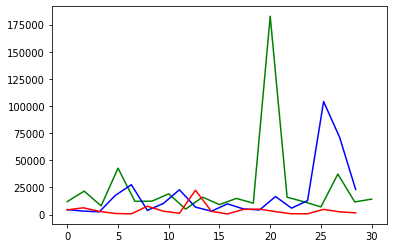

In [ ]:
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'b')
plt.plot(x3, y3, 'r')
#plt.ylim(0,300000)
plt.show()

In [ ]:
matriceAD = np.zeros((len(y1),2))
matriceMCI = np.zeros((len(y2),2))
matriceHC = np.zeros((len(y3),2))


In [ ]:
matriceADHC = np.zeros((len(y1)+len(y3),2))
matriceMCIHC = np.zeros((len(y2)+len(y3),2))
matriceADMCI = np.zeros((len(y1)+len(y2),2))
matriceCASEHC = np.zeros((len(y2)+len(y3)+len(y1),2))

In [ ]:
for i in range(len(y1)):
      matriceAD[i,0]=y1[i]
      matriceAD[i,1]=1

In [ ]:
for i in range(len(y2)):
      matriceMCI[i,0]=y2[i]
      matriceMCI[i,1]=2

In [ ]:
for i in range(len(y3)):
      matriceHC[i,0]=y3[i]
      matriceHC[i,1]=3

In [ ]:
AD=pd.DataFrame(matriceAD)
HC=pd.DataFrame(matriceHC)
MCI=pd.DataFrame(matriceMCI)

In [ ]:
ADHC=AD.copy()
ADHC=ADHC.append(HC,ignore_index=True)

In [ ]:
ADMCI=AD.copy()
ADMCI=ADMCI.append(MCI,ignore_index=True)

In [ ]:
MCIHC=MCI.copy()
MCIHC=MCIHC.append(HC,ignore_index=True)

In [ ]:
CASEHC=AD.copy()
CASEHC=CASEHC.append(MCI,ignore_index=True)
CASEHC=CASEHC.append(HC,ignore_index=True)

#### Caso1 AD vs HCF

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()

In [ ]:
y = np.where(y == 1, 1, 0)

In [ ]:
X,y

(array([ 11941.87873848,  21550.00190442,   7954.53323449,  42676.08920607,
         12148.52499844,  12297.44206568,  19050.99566514,   4992.63032391,
         16011.53399227,   9151.56994628,  14843.20181831,  10445.07001644,
        182700.81680301,  15954.13977107,  11744.1096727 ,   7023.7075574 ,
         37297.83935963,  11622.94020792,  14182.83836805,   4260.98848233,
          6215.95922743,   2878.11366384,    946.37260614,    612.11074237,
          7665.30831264,   3062.98432112,   1211.44062576,  22390.06200896,
          2888.25694934,    563.05778567,   4760.09344506,   4973.64447907,
          2618.74960792,    698.50099081,    703.47702381,   4747.69448038,
          2467.78636984,   1533.93387699]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso1=X_train
X_test_caso1=X_test
y_train_caso1=y_train
y_test_caso1=y_test



In [ ]:
X_train_caso1=X_train_caso1.reshape(-1,1)
X_test_caso1=X_test_caso1.reshape(-1,1)
y_train_caso1=y_train_caso1.reshape(-1,1)
y_test_caso1=y_test_caso1.reshape(-1,1)


In [ ]:
tuning_albero_decisione(1,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.773
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.5s finished


In [ ]:
tuning_SVM(1,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.853
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


In [ ]:
#tuning_foresta(1,10)

In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
#tuning_SVM_CV(1,10)

In [ ]:
#validazione_incrociata_kfold(1,10,1)

In [ ]:
#validazione_incrociata_kfold(1,10,2)

In [ ]:
#validazione_incrociata_score(1,10,1)

In [ ]:
#validazione_incrociata_score(1,10,2)

In [ ]:
#prova_pipeline(1,2)

In [ ]:
tuning_KNN(1,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.813
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(1,5)

In [ ]:
tuning_LR(1,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.653
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[0 6]
 [0 6]]
Accuratezza Test: 50.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_foresta(1,5)

#### Caso2 AD vs MCI

In [ ]:

df=ADMCI.loc[:,0]

X = df.to_numpy()

Y = ADMCI.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=5)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso2=X_train
X_test_caso2=X_test
y_train_caso2=y_train
y_test_caso2=y_test

In [ ]:
X_train_caso2=X_train_caso2.reshape(-1,1)
X_test_caso2=X_test_caso2.reshape(-1,1)
y_train_caso2=y_train_caso2.reshape(-1,1)
y_test_caso2=y_test_caso2.reshape(-1,1)

In [ ]:
tuning_albero_decisione(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.627
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

[[4 2]
 [2 4]]
Accuratezza Test: 66.000
Precisione  Test: 66.000
Sensitività Test: 66.000
Specificità Test: 66.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.5s finished


In [ ]:
tuning_SVM(2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.500
{'kernel': 'rbf'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.50      0.67      0.57         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12

[[2 4]
 [2 4]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 33.000
Specificità Test: 66.000
F1 score    Test: 39.000


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   46.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(2,10)

In [ ]:
#tuning_albero_decisione_CV(2,10)

In [ ]:
#tuning_SVM_CV(2,10)

In [ ]:
#validazione_incrociata_kfold(2,10,1)

In [ ]:
#validazione_incrociata_kfold(2,10,2)

In [ ]:
#validazione_incrociata_score(2,10,1)

In [ ]:
#validazione_incrociata_score(2,10,2)

In [ ]:
#prova_pipeline(2,2)

In [ ]:
#exec_trad(2,1)

In [ ]:
#exec_trad(2,2)

In [ ]:
tuning_KNN(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.700
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

[[4 2]
 [2 4]]
Accuratezza Test: 66.000
Precisione  Test: 66.000
Sensitività Test: 66.000
Specificità Test: 66.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(2,10)

In [ ]:
tuning_LR(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.467
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<br>
<br>

<br>
<br>

In [ ]:
#tuning_foresta(2,10)

#### Caso3 MCI vs HCF

In [ ]:

df=MCIHC.loc[:,0]

X = df.to_numpy()

Y = MCIHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 2, 1, 0)

#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso3=X_train
X_test_caso3=X_test
y_train_caso3=y_train
y_test_caso3=y_test

In [ ]:
X_train_caso3=X_train_caso3.reshape(-1,1)
X_test_caso3=X_test_caso3.reshape(-1,1)
y_train_caso3=y_train_caso3.reshape(-1,1)
y_test_caso3=y_test_caso3.reshape(-1,1)

In [ ]:
tuning_albero_decisione(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.767
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done 2074 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
tuning_SVM(3,10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.817
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 66.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_albero_decisione_CV(3,10)

In [ ]:
#tuning_SVM_CV(3,10)

In [ ]:
#validazione_incrociata_kfold(3,10,1)

In [ ]:
#validazione_incrociata_kfold(3,10,2)

In [ ]:
#validazione_incrociata_score(3,10,1)

In [ ]:
#validazione_incrociata_score(3,10,2)

In [ ]:
#prova_pipeline(3,2)

In [ ]:
#exec_trad(3,1)

In [ ]:
#exec_trad(3,2)

In [ ]:
tuning_KNN(3,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.767
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_MP(3,10)

In [ ]:
tuning_LR(3,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.807
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[0 6]
 [0 6]]
Accuratezza Test: 50.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_foresta(3,10)

#### Caso4 CASE vs HCF

In [ ]:
df=CASEHC.loc[:,0]

X = df.to_numpy()

Y = CASEHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso4=X_train
X_test_caso4=X_test
y_train_caso4=y_train
y_test_caso4=y_test

In [ ]:
X_train_caso4=X_train_caso4.reshape(-1,1)
X_test_caso4=X_test_caso4.reshape(-1,1)
y_train_caso4=y_train_caso4.reshape(-1,1)
y_test_caso4=y_test_caso4.reshape(-1,1)

In [ ]:
tuning_albero_decisione(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.821
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.611
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.43      0.50      0.46         6

    accuracy                           0.61        18
   macro avg       0.58      0.58      0.58        18
weighted avg       0.63      0.61      0.62        18

[[8 4]
 [3 3]]
Accuratezza Test: 61.000
Precisione  Test: 72.000
Sensitività Test: 66.000
Specificità Test: 50.000
F1 score    Test: 68.000


[Parallel(n_jobs=-1)]: Done 1050 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.6s finished


In [ ]:
tuning_SVM(4,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.825
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.722
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.57      0.67      0.62         6

    accuracy                           0.72        18
   macro avg       0.69      0.71      0.70        18
weighted avg       0.74      0.72      0.73        18

[[9 3]
 [2 4]]
Accuratezza Test: 72.000
Precisione  Test: 81.000
Sensitività Test: 75.000
Specificità Test: 66.000
F1 score    Test: 77.000


In [ ]:
#tuning_albero_decisione_CV(4,10)

In [ ]:
#tuning_SVM_CV(4,10)

In [ ]:
#validazione_incrociata_kfold(4,10,1)

In [ ]:
#validazione_incrociata_kfold(4,10,2)

In [ ]:
#validazione_incrociata_score(4,10,1)

In [ ]:
#validazione_incrociata_score(4,10,2)

In [ ]:
#prova_pipeline(4,2)

In [ ]:
#exec_trad(4,1)

In [ ]:
#exec_trad(4,2)

In [ ]:
tuning_KNN(4,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.825
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}
Accuratezza con dati di Test: 0.611
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.43      0.50      0.46         6

    accuracy                           0.61        18
   macro avg       0.58      0.58      0.58        18
weighted avg       0.63      0.61      0.62        18

[[8 4]
 [3 3]]
Accuratezza Test: 61.000
Precisione  Test: 72.000
Sensitività Test: 66.000
Specificità Test: 50.000
F1 score    Test: 68.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(4,10)

In [ ]:
tuning_LR(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.825
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.722
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.57      0.67      0.62         6

    accuracy                           0.72        18
   macro avg       0.69      0.71      0.70        18
weighted avg       0.74      0.72      0.73        18

[[9 3]
 [2 4]]
Accuratezza Test: 72.000
Precisione  Test: 81.000
Sensitività Test: 75.000
Specificità Test: 66.000
F1 score    Test: 77.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(4,10)

<br>
<br>

### 4 hz

In [ ]:

y1=hz4.loc[:,0].to_numpy()
y2=hz4.loc[:,1].to_numpy()
y3=hz4.loc[:,2].to_numpy()



In [ ]:
y1,y2,y3,hz3

(array([ 9975.58991528, 78349.23148313,  5366.27036613, 35355.19572558,
         4516.99338283,  7097.37597394, 19055.2658651 ,  6493.44169099,
        39428.4358365 ,  6553.36739722,  7297.73006652, 10679.80134239,
        68775.38741324,  6891.19709735,  3366.63281144, 10412.14102347,
        35259.80361413,  6942.62834894,  5696.638515  ]),
 array([ 3278.94543908,  1989.01632392,  1609.77594249, 16011.10808331,
        28503.2867512 ,  1933.71496518,  6199.15291648, 13872.81560342,
         5165.79479087,  1917.91737537,  8220.29046406,  4227.34083582,
         3209.92073741, 21627.49548375,  4117.50737171,  6434.64959203,
        59546.07679633, 31466.18637085, 24481.09052705]),
 array([ 3685.27635041,  4907.40522338,  2491.8084164 ,   811.55063025,
          542.49083525,  4879.68164543,  2466.41436217,  1121.62303151,
        14160.09919403,  2364.13823891,   473.20955415,  4011.5578254 ,
         4284.30889563,  2234.46682334,   565.09558521,   627.18986308,
         4633.559774

In [ ]:
x1 = np.linspace(0, 19, len(y1), endpoint=True)
x2 = np.linspace(0, 19,len(y2), endpoint=True)
x3 = np.linspace(0, 19,len(y3), endpoint=True)

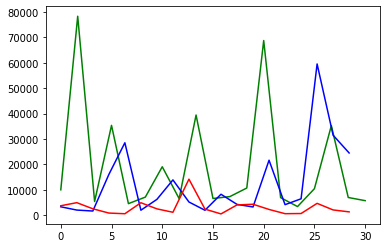

In [ ]:
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'b')
plt.plot(x3, y3, 'r')
#plt.ylim(0,300000)
plt.show()

In [ ]:
matriceAD = np.zeros((len(y1),2))
matriceMCI = np.zeros((len(y2),2))
matriceHC = np.zeros((len(y3),2))


In [ ]:
matriceADHC = np.zeros((len(y1)+len(y3),2))
matriceMCIHC = np.zeros((len(y2)+len(y3),2))
matriceADMCI = np.zeros((len(y1)+len(y2),2))
matriceCASEHC = np.zeros((len(y2)+len(y3)+len(y1),2))

In [ ]:
for i in range(len(y1)):
      matriceAD[i,0]=y1[i]
      matriceAD[i,1]=1

In [ ]:
for i in range(len(y2)):
      matriceMCI[i,0]=y2[i]
      matriceMCI[i,1]=2

In [ ]:
for i in range(len(y3)):
      matriceHC[i,0]=y3[i]
      matriceHC[i,1]=3

In [ ]:
AD=pd.DataFrame(matriceAD)
HC=pd.DataFrame(matriceHC)
MCI=pd.DataFrame(matriceMCI)

In [ ]:
ADHC=AD.copy()
ADHC=ADHC.append(HC,ignore_index=True)

In [ ]:
ADMCI=AD.copy()
ADMCI=ADMCI.append(MCI,ignore_index=True)

In [ ]:
MCIHC=MCI.copy()
MCIHC=MCIHC.append(HC,ignore_index=True)

In [ ]:
CASEHC=AD.copy()
CASEHC=CASEHC.append(MCI,ignore_index=True)
CASEHC=CASEHC.append(HC,ignore_index=True)

#### Caso1 AD vs HCF

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()

In [ ]:
y = np.where(y == 1, 1, 0)

In [ ]:
X,y

(array([ 9975.58991528, 78349.23148313,  5366.27036613, 35355.19572558,
         4516.99338283,  7097.37597394, 19055.2658651 ,  6493.44169099,
        39428.4358365 ,  6553.36739722,  7297.73006652, 10679.80134239,
        68775.38741324,  6891.19709735,  3366.63281144, 10412.14102347,
        35259.80361413,  6942.62834894,  5696.638515  ,  3685.27635041,
         4907.40522338,  2491.8084164 ,   811.55063025,   542.49083525,
         4879.68164543,  2466.41436217,  1121.62303151, 14160.09919403,
         2364.13823891,   473.20955415,  4011.5578254 ,  4284.30889563,
         2234.46682334,   565.09558521,   627.18986308,  4633.55977466,
         2040.06304235,  1277.5753047 ]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso1=X_train
X_test_caso1=X_test
y_train_caso1=y_train
y_test_caso1=y_test



In [ ]:
X_train_caso1=X_train_caso1.reshape(-1,1)
X_test_caso1=X_test_caso1.reshape(-1,1)
y_train_caso1=y_train_caso1.reshape(-1,1)
y_test_caso1=y_test_caso1.reshape(-1,1)


In [ ]:
tuning_albero_decisione(1,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.893
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 1050 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.6s finished


In [ ]:
tuning_SVM(1,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.773
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


In [ ]:
#tuning_foresta(1,10)

In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
#tuning_SVM_CV(1,10)

In [ ]:
#validazione_incrociata_kfold(1,10,1)

In [ ]:
#validazione_incrociata_kfold(1,10,2)

In [ ]:
#validazione_incrociata_score(1,10,1)

In [ ]:
#validazione_incrociata_score(1,10,2)

In [ ]:
#prova_pipeline(1,2)

In [ ]:
tuning_KNN(1,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.813
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(1,5)

In [ ]:
tuning_LR(1,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.773
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 0.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(1,5)

#### Caso2 AD vs MCI

In [ ]:

df=ADMCI.loc[:,0]

X = df.to_numpy()

Y = ADMCI.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=5)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso2=X_train
X_test_caso2=X_test
y_train_caso2=y_train
y_test_caso2=y_test

In [ ]:
X_train_caso2=X_train_caso2.reshape(-1,1)
X_test_caso2=X_test_caso2.reshape(-1,1)
y_train_caso2=y_train_caso2.reshape(-1,1)
y_test_caso2=y_test_caso2.reshape(-1,1)

In [ ]:
tuning_albero_decisione(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.540
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.67      1.00      0.80         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

[[3 3]
 [0 6]]
Accuratezza Test: 75.000
Precisione  Test: 100.000
Sensitività Test: 50.000
Specificità Test: 100.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.5s finished


In [ ]:
tuning_SVM(2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.380
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 66.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_foresta(2,10)

In [ ]:
#tuning_albero_decisione_CV(2,10)

In [ ]:
#tuning_SVM_CV(2,10)

In [ ]:
#validazione_incrociata_kfold(2,10,1)

In [ ]:
#validazione_incrociata_kfold(2,10,2)

In [ ]:
#validazione_incrociata_score(2,10,1)

In [ ]:
#validazione_incrociata_score(2,10,2)

In [ ]:
#prova_pipeline(2,2)

In [ ]:
#exec_trad(2,1)

In [ ]:
#exec_trad(2,2)

In [ ]:
tuning_KNN(2,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.620
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.67      1.00      0.80         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

[[3 3]
 [0 6]]
Accuratezza Test: 75.000
Precisione  Test: 100.000
Sensitività Test: 50.000
Specificità Test: 100.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(2,10)

In [ ]:
tuning_LR(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.393
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[0 6]
 [0 6]]
Accuratezza Test: 50.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<br>
<br>

<br>
<br>

In [ ]:
#tuning_foresta(2,10)

#### Caso3 MCI vs HCF

In [ ]:

df=MCIHC.loc[:,0]

X = df.to_numpy()

Y = MCIHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 2, 1, 0)

#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso3=X_train
X_test_caso3=X_test
y_train_caso3=y_train
y_test_caso3=y_test

In [ ]:
X_train_caso3=X_train_caso3.reshape(-1,1)
X_test_caso3=X_test_caso3.reshape(-1,1)
y_train_caso3=y_train_caso3.reshape(-1,1)
y_test_caso3=y_test_caso3.reshape(-1,1)

In [ ]:
tuning_albero_decisione(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.867
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done 2090 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
tuning_SVM(3,10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.750
{'kernel': 'rbf'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_albero_decisione_CV(3,10)

In [ ]:
#tuning_SVM_CV(3,10)

In [ ]:
#validazione_incrociata_kfold(3,10,1)

In [ ]:
#validazione_incrociata_kfold(3,10,2)

In [ ]:
#validazione_incrociata_score(3,10,1)

In [ ]:
#validazione_incrociata_score(3,10,2)

In [ ]:
#prova_pipeline(3,2)

In [ ]:
#exec_trad(3,1)

In [ ]:
#exec_trad(3,2)

In [ ]:
tuning_KNN(3,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.767
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_MP(3,10)

In [ ]:
tuning_LR(3,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.767
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done  67 out of  70 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_foresta(3,10)

#### Caso4 CASE vs HCF

In [ ]:
df=CASEHC.loc[:,0]

X = df.to_numpy()

Y = CASEHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso4=X_train
X_test_caso4=X_test
y_train_caso4=y_train
y_test_caso4=y_test

In [ ]:
X_train_caso4=X_train_caso4.reshape(-1,1)
X_test_caso4=X_test_caso4.reshape(-1,1)
y_train_caso4=y_train_caso4.reshape(-1,1)
y_test_caso4=y_test_caso4.reshape(-1,1)

In [ ]:
tuning_albero_decisione(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.825
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.778
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.67      0.67      0.67         6

    accuracy                           0.78        18
   macro avg       0.75      0.75      0.75        18
weighted avg       0.78      0.78      0.78        18

[[10  2]
 [ 2  4]]
Accuratezza Test: 77.000
Precisione  Test: 83.000
Sensitività Test: 83.000
Specificità Test: 66.000
F1 score    Test: 83.000


[Parallel(n_jobs=-1)]: Done 1067 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.5s finished


In [ ]:
tuning_SVM(4,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   23.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.825
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.50      0.67      0.57         6

    accuracy                           0.67        18
   macro avg       0.65      0.67      0.65        18
weighted avg       0.70      0.67      0.68        18

[[8 4]
 [2 4]]
Accuratezza Test: 66.000
Precisione  Test: 80.000
Sensitività Test: 66.000
Specificità Test: 66.000
F1 score    Test: 72.000


In [ ]:
#tuning_albero_decisione_CV(4,10)

In [ ]:
#tuning_SVM_CV(4,10)

In [ ]:
#validazione_incrociata_kfold(4,10,1)

In [ ]:
#validazione_incrociata_kfold(4,10,2)

In [ ]:
#validazione_incrociata_score(4,10,1)

In [ ]:
#validazione_incrociata_score(4,10,2)

In [ ]:
#prova_pipeline(4,2)

In [ ]:
#exec_trad(4,1)

In [ ]:
#exec_trad(4,2)

In [ ]:
tuning_KNN(4,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.750
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 0.889
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.67      0.80         6

    accuracy                           0.89        18
   macro avg       0.93      0.83      0.86        18
weighted avg       0.90      0.89      0.88        18

[[12  0]
 [ 2  4]]
Accuratezza Test: 88.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 66.000
F1 score    Test: 91.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(4,10)

In [ ]:
tuning_LR(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.825
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.50      0.67      0.57         6

    accuracy                           0.67        18
   macro avg       0.65      0.67      0.65        18
weighted avg       0.70      0.67      0.68        18

[[8 4]
 [2 4]]
Accuratezza Test: 66.000
Precisione  Test: 80.000
Sensitività Test: 66.000
Specificità Test: 66.000
F1 score    Test: 72.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(4,10)

<br>
<br>

### 5 hz

In [ ]:

y1=hz5.loc[:,0].to_numpy()
y2=hz5.loc[:,1].to_numpy()
y3=hz5.loc[:,2].to_numpy()



In [ ]:
y1,y2,y3,hz3

(array([ 14743.7467391 , 142197.52793324,   8872.84146972,  35857.40742789,
          3735.07963105,   9840.14076053,  13898.04604296,  11151.17830918,
         62131.60213414,  10615.79119497,   4395.75280149,  18553.16158274,
          8588.46189756,   4897.29331135,   6091.46616001,  21209.77829687,
         38502.5356624 ,   9677.37949005,   2900.84970437]),
 array([ 3191.71340257,  1478.5148852 ,  1036.83442708,  8294.09569593,
        25959.29947074,  2395.81808669,  5358.75450392,  6998.39125534,
         3920.91895401,  1315.343393  ,  4211.88716659,  4105.21677954,
         3758.78262634, 23182.9581754 ,  1496.02424271,  1764.92530093,
        20885.68540659, 15766.46072284, 28017.13848049]),
 array([2032.18438411, 2061.0165368 , 1014.27299517,  402.78584981,
         145.53790165, 2439.61747033, 1003.39382556,  650.46323346,
        6601.1741776 ,  961.53940522,  207.70975292, 2263.28741708,
        2099.71343148,  785.82287287,  175.90032873,  159.29906569,
        2930.1607

In [ ]:
x1 = np.linspace(0, 30, len(y1), endpoint=True)
x2 = np.linspace(0, 30,len(y2), endpoint=False)
x3 = np.linspace(0, 30,len(y3), endpoint=False)

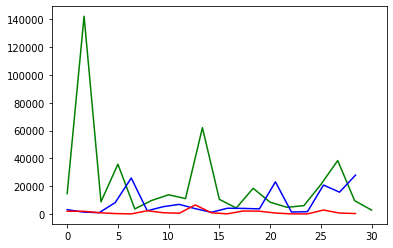

In [ ]:
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'b')
plt.plot(x3, y3, 'r')
#plt.ylim(0,300000)
plt.show()

In [ ]:
matriceAD = np.zeros((len(y1),2))
matriceMCI = np.zeros((len(y2),2))
matriceHC = np.zeros((len(y3),2))


In [ ]:
matriceADHC = np.zeros((len(y1)+len(y3),2))
matriceMCIHC = np.zeros((len(y2)+len(y3),2))
matriceADMCI = np.zeros((len(y1)+len(y2),2))
matriceCASEHC = np.zeros((len(y2)+len(y3)+len(y1),2))

In [ ]:
for i in range(len(y1)):
      matriceAD[i,0]=y1[i]
      matriceAD[i,1]=1

In [ ]:
for i in range(len(y2)):
      matriceMCI[i,0]=y2[i]
      matriceMCI[i,1]=2

In [ ]:
for i in range(len(y3)):
      matriceHC[i,0]=y3[i]
      matriceHC[i,1]=3

In [ ]:
AD=pd.DataFrame(matriceAD)
HC=pd.DataFrame(matriceHC)
MCI=pd.DataFrame(matriceMCI)

In [ ]:
ADHC=AD.copy()
ADHC=ADHC.append(HC,ignore_index=True)

In [ ]:
ADMCI=AD.copy()
ADMCI=ADMCI.append(MCI,ignore_index=True)

In [ ]:
MCIHC=MCI.copy()
MCIHC=MCIHC.append(HC,ignore_index=True)

In [ ]:
CASEHC=AD.copy()
CASEHC=CASEHC.append(MCI,ignore_index=True)
CASEHC=CASEHC.append(HC,ignore_index=True)

#### Caso1 AD vs HCF

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()

In [ ]:
y = np.where(y == 1, 1, 0)

In [ ]:
X,y

(array([ 14743.7467391 , 142197.52793324,   8872.84146972,  35857.40742789,
          3735.07963105,   9840.14076053,  13898.04604296,  11151.17830918,
         62131.60213414,  10615.79119497,   4395.75280149,  18553.16158274,
          8588.46189756,   4897.29331135,   6091.46616001,  21209.77829687,
         38502.5356624 ,   9677.37949005,   2900.84970437,   2032.18438411,
          2061.0165368 ,   1014.27299517,    402.78584981,    145.53790165,
          2439.61747033,   1003.39382556,    650.46323346,   6601.1741776 ,
           961.53940522,    207.70975292,   2263.28741708,   2099.71343148,
           785.82287287,    175.90032873,    159.29906569,   2930.16071893,
           764.27026318,    422.72992815]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso1=X_train
X_test_caso1=X_test
y_train_caso1=y_train
y_test_caso1=y_test



In [ ]:
X_train_caso1=X_train_caso1.reshape(-1,1)
X_test_caso1=X_test_caso1.reshape(-1,1)
y_train_caso1=y_train_caso1.reshape(-1,1)
y_test_caso1=y_test_caso1.reshape(-1,1)


In [ ]:
tuning_albero_decisione(1,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.893
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.3s finished


In [ ]:
tuning_SVM(1,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.893
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


In [ ]:
#tuning_foresta(1,10)

In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
#tuning_SVM_CV(1,10)

In [ ]:
#validazione_incrociata_kfold(1,10,1)

In [ ]:
#validazione_incrociata_kfold(1,10,2)

In [ ]:
#validazione_incrociata_score(1,10,1)

In [ ]:
#validazione_incrociata_score(1,10,2)

In [ ]:
#prova_pipeline(1,2)

In [ ]:
tuning_KNN(1,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.893
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done  77 out of  80 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(1,5)

In [ ]:
tuning_LR(1,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.853
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 0.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(1,5)

#### Caso2 AD vs MCI

In [ ]:

df=ADMCI.loc[:,0]

X = df.to_numpy()

Y = ADMCI.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=5)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso2=X_train
X_test_caso2=X_test
y_train_caso2=y_train
y_test_caso2=y_test

In [ ]:
X_train_caso2=X_train_caso2.reshape(-1,1)
X_test_caso2=X_test_caso2.reshape(-1,1)
y_train_caso2=y_train_caso2.reshape(-1,1)
y_test_caso2=y_test_caso2.reshape(-1,1)

In [ ]:
tuning_albero_decisione(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.580
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.71      0.83      0.77         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12

[[4 2]
 [1 5]]
Accuratezza Test: 75.000
Precisione  Test: 80.000
Sensitività Test: 66.000
Specificità Test: 83.000
F1 score    Test: 72.000


[Parallel(n_jobs=-1)]: Done 955 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.4s finished


In [ ]:
tuning_SVM(2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.507
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.60      1.00      0.75         6

    accuracy                           0.67        12
   macro avg       0.80      0.67      0.62        12
weighted avg       0.80      0.67      0.62        12

[[2 4]
 [0 6]]
Accuratezza Test: 66.000
Precisione  Test: 100.000
Sensitività Test: 33.000
Specificità Test: 100.000
F1 score    Test: 49.000


In [ ]:
#tuning_foresta(2,10)

In [ ]:
#tuning_albero_decisione_CV(2,10)

In [ ]:
#tuning_SVM_CV(2,10)

In [ ]:
#validazione_incrociata_kfold(2,10,1)

In [ ]:
#validazione_incrociata_kfold(2,10,2)

In [ ]:
#validazione_incrociata_score(2,10,1)

In [ ]:
#validazione_incrociata_score(2,10,2)

In [ ]:
#prova_pipeline(2,2)

In [ ]:
#exec_trad(2,1)

In [ ]:
#exec_trad(2,2)

In [ ]:
tuning_KNN(2,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.580
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       0.50      0.17      0.25         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.44        12
weighted avg       0.50      0.50      0.44        12

[[5 1]
 [5 1]]
Accuratezza Test: 50.000
Precisione  Test: 50.000
Sensitività Test: 83.000
Specificità Test: 16.000
F1 score    Test: 62.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(2,10)

In [ ]:
tuning_LR(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.500
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[0 6]
 [0 6]]
Accuratezza Test: 50.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<br>
<br>

<br>
<br>

In [ ]:
#tuning_foresta(2,10)

#### Caso3 MCI vs HCF

In [ ]:

df=MCIHC.loc[:,0]

X = df.to_numpy()

Y = MCIHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 2, 1, 0)

#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso3=X_train
X_test_caso3=X_test
y_train_caso3=y_train
y_test_caso3=y_test

In [ ]:
X_train_caso3=X_train_caso3.reshape(-1,1)
X_test_caso3=X_test_caso3.reshape(-1,1)
y_train_caso3=y_train_caso3.reshape(-1,1)
y_test_caso3=y_test_caso3.reshape(-1,1)

In [ ]:
tuning_albero_decisione(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    2.3s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.833
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12

[[6 0]
 [2 4]]
Accuratezza Test: 83.000
Precisione  Test: 75.000
Sensitività Test: 100.000
Specificità Test: 66.000
F1 score    Test: 85.000


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.8s finished


In [ ]:
tuning_SVM(3,10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   45.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.867
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

[[6 0]
 [3 3]]
Accuratezza Test: 75.000
Precisione  Test: 66.000
Sensitività Test: 100.000
Specificità Test: 50.000
F1 score    Test: 79.000


In [ ]:
#tuning_albero_decisione_CV(3,10)

In [ ]:
#tuning_SVM_CV(3,10)

In [ ]:
#validazione_incrociata_kfold(3,10,1)

In [ ]:
#validazione_incrociata_kfold(3,10,2)

In [ ]:
#validazione_incrociata_score(3,10,1)

In [ ]:
#validazione_incrociata_score(3,10,2)

In [ ]:
#prova_pipeline(3,2)

In [ ]:
#exec_trad(3,1)

In [ ]:
#exec_trad(3,2)

In [ ]:
tuning_KNN(3,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.807
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12

[[6 0]
 [2 4]]
Accuratezza Test: 83.000
Precisione  Test: 75.000
Sensitività Test: 100.000
Specificità Test: 66.000
F1 score    Test: 85.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(3,10)

In [ ]:
tuning_LR(3,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.773
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.33      0.50         6

    accuracy                           0.67        12
   macro avg       0.80      0.67      0.62        12
weighted avg       0.80      0.67      0.62        12

[[6 0]
 [4 2]]
Accuratezza Test: 66.000
Precisione  Test: 60.000
Sensitività Test: 100.000
Specificità Test: 33.000
F1 score    Test: 75.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(3,10)

#### Caso4 CASE vs HCF

In [ ]:
df=CASEHC.loc[:,0]

X = df.to_numpy()

Y = CASEHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso4=X_train
X_test_caso4=X_test
y_train_caso4=y_train
y_test_caso4=y_test

In [ ]:
X_train_caso4=X_train_caso4.reshape(-1,1)
X_test_caso4=X_test_caso4.reshape(-1,1)
y_train_caso4=y_train_caso4.reshape(-1,1)
y_test_caso4=y_test_caso4.reshape(-1,1)

In [ ]:
tuning_albero_decisione(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.875
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.71      0.83      0.77         6

    accuracy                           0.83        18
   macro avg       0.81      0.83      0.82        18
weighted avg       0.84      0.83      0.84        18

[[10  2]
 [ 1  5]]
Accuratezza Test: 83.000
Precisione  Test: 90.000
Sensitività Test: 83.000
Specificità Test: 83.000
F1 score    Test: 86.000


[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.5s finished


In [ ]:
tuning_SVM(4,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.825
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.778
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.62      0.83      0.71         6

    accuracy                           0.78        18
   macro avg       0.76      0.79      0.77        18
weighted avg       0.81      0.78      0.78        18

[[9 3]
 [1 5]]
Accuratezza Test: 77.000
Precisione  Test: 90.000
Sensitività Test: 75.000
Specificità Test: 83.000
F1 score    Test: 81.000


In [ ]:
#tuning_albero_decisione_CV(4,10)

In [ ]:
#tuning_SVM_CV(4,10)

In [ ]:
#validazione_incrociata_kfold(4,10,1)

In [ ]:
#validazione_incrociata_kfold(4,10,2)

In [ ]:
#validazione_incrociata_score(4,10,1)

In [ ]:
#validazione_incrociata_score(4,10,2)

In [ ]:
#prova_pipeline(4,2)

In [ ]:
#exec_trad(4,1)

In [ ]:
#exec_trad(4,2)

In [ ]:
tuning_KNN(4,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.900
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.722
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.56      0.83      0.67         6

    accuracy                           0.72        18
   macro avg       0.72      0.75      0.71        18
weighted avg       0.78      0.72      0.73        18

[[8 4]
 [1 5]]
Accuratezza Test: 72.000
Precisione  Test: 88.000
Sensitività Test: 66.000
Specificità Test: 83.000
F1 score    Test: 75.000


[Parallel(n_jobs=-1)]: Done  77 out of  80 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(4,10)

In [ ]:
tuning_LR(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.850
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.778
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.62      0.83      0.71         6

    accuracy                           0.78        18
   macro avg       0.76      0.79      0.77        18
weighted avg       0.81      0.78      0.78        18

[[9 3]
 [1 5]]
Accuratezza Test: 77.000
Precisione  Test: 90.000
Sensitività Test: 75.000
Specificità Test: 83.000
F1 score    Test: 81.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(4,10)

<br>
<br>

### 6 hz

In [ ]:

y1=hz6.loc[:,0].to_numpy()
y2=hz6.loc[:,1].to_numpy()
y3=hz6.loc[:,2].to_numpy()



In [ ]:
y1,y2,y3,hz3

(array([ 20605.35781238, 193059.86999533,  13548.13442627,  40440.35877151,
          5677.21419155,  15435.65164431,  23898.92330471,  15598.78588432,
         81566.30175693,  16178.62229427,   7095.43878758,  27126.23245298,
         19277.66646264,   6515.92762751,  13880.98858739,  35663.43466399,
         42157.56354046,  16978.64259144,   3615.01427794]),
 array([ 6712.8763669 ,  3137.64253139,  2514.00498426, 18783.19356326,
        33016.01258108,  7664.32314507, 11645.5581384 ,  7424.58816717,
         7738.00911809,  2908.96978721,  8067.29135074,  6748.82757693,
         5920.94917521, 30404.19845216,  5717.39335481,  6064.70074557,
        28428.83334165, 28281.78545888, 40953.73417881]),
 array([1829.15314726, 1384.91699972,  806.73095217,  436.88486117,
         239.82324028, 1605.4569868 ,  727.66069501,  796.24790332,
        3544.14340126,  858.96199285,  287.55758294, 2360.14270563,
        1720.64241207,  720.97309496,  222.42531001,  224.37192244,
        2847.2963

In [ ]:
x1 = np.linspace(0, 30, len(y1), endpoint=True)
x2 = np.linspace(0, 30,len(y2), endpoint=False)
x3 = np.linspace(0, 30,len(y3), endpoint=False)

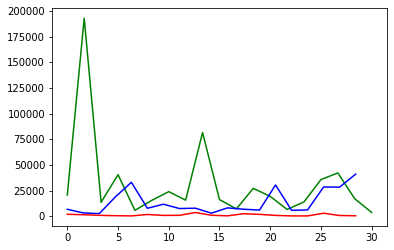

In [ ]:
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'b')
plt.plot(x3, y3, 'r')
#plt.ylim(0,300000)
plt.show()

In [ ]:
matriceAD = np.zeros((len(y1),2))
matriceMCI = np.zeros((len(y2),2))
matriceHC = np.zeros((len(y3),2))


In [ ]:
matriceADHC = np.zeros((len(y1)+len(y3),2))
matriceMCIHC = np.zeros((len(y2)+len(y3),2))
matriceADMCI = np.zeros((len(y1)+len(y2),2))
matriceCASEHC = np.zeros((len(y2)+len(y3)+len(y1),2))

In [ ]:
for i in range(len(y1)):
      matriceAD[i,0]=y1[i]
      matriceAD[i,1]=1

In [ ]:
for i in range(len(y2)):
      matriceMCI[i,0]=y2[i]
      matriceMCI[i,1]=2

In [ ]:
for i in range(len(y3)):
      matriceHC[i,0]=y3[i]
      matriceHC[i,1]=3

In [ ]:
AD=pd.DataFrame(matriceAD)
HC=pd.DataFrame(matriceHC)
MCI=pd.DataFrame(matriceMCI)

In [ ]:
ADHC=AD.copy()
ADHC=ADHC.append(HC,ignore_index=True)

In [ ]:
ADMCI=AD.copy()
ADMCI=ADMCI.append(MCI,ignore_index=True)

In [ ]:
MCIHC=MCI.copy()
MCIHC=MCIHC.append(HC,ignore_index=True)

In [ ]:
CASEHC=AD.copy()
CASEHC=CASEHC.append(MCI,ignore_index=True)
CASEHC=CASEHC.append(HC,ignore_index=True)

#### Caso1 AD vs HCF

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()

In [ ]:
y = np.where(y == 1, 1, 0)

In [ ]:
X,y

(array([ 20605.35781238, 193059.86999533,  13548.13442627,  40440.35877151,
          5677.21419155,  15435.65164431,  23898.92330471,  15598.78588432,
         81566.30175693,  16178.62229427,   7095.43878758,  27126.23245298,
         19277.66646264,   6515.92762751,  13880.98858739,  35663.43466399,
         42157.56354046,  16978.64259144,   3615.01427794,   1829.15314726,
          1384.91699972,    806.73095217,    436.88486117,    239.82324028,
          1605.4569868 ,    727.66069501,    796.24790332,   3544.14340126,
           858.96199285,    287.55758294,   2360.14270563,   1720.64241207,
           720.97309496,    222.42531001,    224.37192244,   2847.29639847,
           606.95348046,    377.37949283]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso1=X_train
X_test_caso1=X_test
y_train_caso1=y_train
y_test_caso1=y_test



In [ ]:
X_train_caso1=X_train_caso1.reshape(-1,1)
X_test_caso1=X_test_caso1.reshape(-1,1)
y_train_caso1=y_train_caso1.reshape(-1,1)
y_test_caso1=y_test_caso1.reshape(-1,1)


In [ ]:
tuning_albero_decisione(1,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.927
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.5s finished


In [ ]:
tuning_SVM(1,5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.927
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(1,10)

In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
#tuning_SVM_CV(1,10)

In [ ]:
#validazione_incrociata_kfold(1,10,1)

In [ ]:
#validazione_incrociata_kfold(1,10,2)

In [ ]:
#validazione_incrociata_score(1,10,1)

In [ ]:
#validazione_incrociata_score(1,10,2)

In [ ]:
#prova_pipeline(1,2)

In [ ]:
tuning_KNN(1,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.927
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(1,5)

In [ ]:
tuning_LR(1,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.927
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 0.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(1,5)

#### Caso2 AD vs MCI

In [ ]:

df=ADMCI.loc[:,0]

X = df.to_numpy()

Y = ADMCI.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=5)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso2=X_train
X_test_caso2=X_test
y_train_caso2=y_train
y_test_caso2=y_test

In [ ]:
X_train_caso2=X_train_caso2.reshape(-1,1)
X_test_caso2=X_test_caso2.reshape(-1,1)
y_train_caso2=y_train_caso2.reshape(-1,1)
y_test_caso2=y_test_caso2.reshape(-1,1)

In [ ]:
tuning_albero_decisione(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.653
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.60      0.50      0.55         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12

[[4 2]
 [3 3]]
Accuratezza Test: 58.000
Precisione  Test: 57.000
Sensitività Test: 66.000
Specificità Test: 50.000
F1 score    Test: 61.000


[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.2s finished


In [ ]:
tuning_SVM(2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.587
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.60      1.00      0.75         6

    accuracy                           0.67        12
   macro avg       0.80      0.67      0.62        12
weighted avg       0.80      0.67      0.62        12

[[2 4]
 [0 6]]
Accuratezza Test: 66.000
Precisione  Test: 100.000
Sensitività Test: 33.000
Specificità Test: 100.000
F1 score    Test: 49.000


In [ ]:
#tuning_foresta(2,10)

In [ ]:
#tuning_albero_decisione_CV(2,10)

In [ ]:
#tuning_SVM_CV(2,10)

In [ ]:
#validazione_incrociata_kfold(2,10,1)

In [ ]:
#validazione_incrociata_kfold(2,10,2)

In [ ]:
#validazione_incrociata_score(2,10,1)

In [ ]:
#validazione_incrociata_score(2,10,2)

In [ ]:
#prova_pipeline(2,2)

In [ ]:
#exec_trad(2,1)

In [ ]:
#exec_trad(2,2)

In [ ]:
tuning_KNN(2,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.540
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      0.17      0.29         6

    accuracy                           0.58        12
   macro avg       0.77      0.58      0.50        12
weighted avg       0.77      0.58      0.50        12

[[6 0]
 [5 1]]
Accuratezza Test: 58.000
Precisione  Test: 54.000
Sensitività Test: 100.000
Specificità Test: 16.000
F1 score    Test: 70.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(2,10)

In [ ]:
tuning_LR(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.500
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.500
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[0 6]
 [0 6]]
Accuratezza Test: 50.000
Precisione  Test: 0.000
Sensitività Test: 0.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<br>
<br>

<br>
<br>

In [ ]:
#tuning_foresta(2,10)

#### Caso3 MCI vs HCF

In [ ]:

df=MCIHC.loc[:,0]

X = df.to_numpy()

Y = MCIHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 2, 1, 0)

#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso3=X_train
X_test_caso3=X_test
y_train_caso3=y_train
y_test_caso3=y_test

In [ ]:
X_train_caso3=X_train_caso3.reshape(-1,1)
X_test_caso3=X_test_caso3.reshape(-1,1)
y_train_caso3=y_train_caso3.reshape(-1,1)
y_test_caso3=y_test_caso3.reshape(-1,1)

In [ ]:
tuning_albero_decisione(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12

[[6 0]
 [2 4]]
Accuratezza Test: 83.000
Precisione  Test: 75.000
Sensitività Test: 100.000
Specificità Test: 66.000
F1 score    Test: 85.000


[Parallel(n_jobs=-1)]: Done 2079 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.9s finished


In [ ]:
tuning_SVM(3,10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12

[[6 0]
 [2 4]]
Accuratezza Test: 83.000
Precisione  Test: 75.000
Sensitività Test: 100.000
Specificità Test: 66.000
F1 score    Test: 85.000


In [ ]:
#tuning_albero_decisione_CV(3,10)

In [ ]:
#tuning_SVM_CV(3,10)

In [ ]:
#validazione_incrociata_kfold(3,10,1)

In [ ]:
#validazione_incrociata_kfold(3,10,2)

In [ ]:
#validazione_incrociata_score(3,10,1)

In [ ]:
#validazione_incrociata_score(3,10,2)

In [ ]:
#prova_pipeline(3,2)

In [ ]:
#exec_trad(3,1)

In [ ]:
#exec_trad(3,2)

In [ ]:
tuning_KNN(3,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.960
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12

[[6 0]
 [2 4]]
Accuratezza Test: 83.000
Precisione  Test: 75.000
Sensitività Test: 100.000
Specificità Test: 66.000
F1 score    Test: 85.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(3,10)

In [ ]:
tuning_LR(3,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.893
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12

[[6 0]
 [2 4]]
Accuratezza Test: 83.000
Precisione  Test: 75.000
Sensitività Test: 100.000
Specificità Test: 66.000
F1 score    Test: 85.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(3,10)

#### Caso4 CASE vs HCF

In [ ]:
df=CASEHC.loc[:,0]

X = df.to_numpy()

Y = CASEHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso4=X_train
X_test_caso4=X_test
y_train_caso4=y_train
y_test_caso4=y_test

In [ ]:
X_train_caso4=X_train_caso4.reshape(-1,1)
X_test_caso4=X_test_caso4.reshape(-1,1)
y_train_caso4=y_train_caso4.reshape(-1,1)
y_test_caso4=y_test_caso4.reshape(-1,1)

In [ ]:
tuning_albero_decisione(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.925
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.67      1.00      0.80         6

    accuracy                           0.83        18
   macro avg       0.83      0.88      0.83        18
weighted avg       0.89      0.83      0.84        18

[[9 3]
 [0 6]]
Accuratezza Test: 83.000
Precisione  Test: 100.000
Sensitività Test: 75.000
Specificità Test: 100.000
F1 score    Test: 85.000


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.5s finished


In [ ]:
tuning_SVM(4,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.2s remaining:    0.5s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'kernel': 'rbf'}
Accuratezza con dati di Test: 0.667
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.50      1.00      0.67         6

    accuracy                           0.67        18
   macro avg       0.75      0.75      0.67        18
weighted avg       0.83      0.67      0.67        18

[[6 6]
 [0 6]]
Accuratezza Test: 66.000
Precisione  Test: 100.000
Sensitività Test: 50.000
Specificità Test: 100.000
F1 score    Test: 66.000


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_albero_decisione_CV(4,10)

In [ ]:
#tuning_SVM_CV(4,10)

In [ ]:
#validazione_incrociata_kfold(4,10,1)

In [ ]:
#validazione_incrociata_kfold(4,10,2)

In [ ]:
#validazione_incrociata_score(4,10,1)

In [ ]:
#validazione_incrociata_score(4,10,2)

In [ ]:
#prova_pipeline(4,2)

In [ ]:
#exec_trad(4,1)

In [ ]:
#exec_trad(4,2)

In [ ]:
tuning_KNN(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.975
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.67      1.00      0.80         6

    accuracy                           0.83        18
   macro avg       0.83      0.88      0.83        18
weighted avg       0.89      0.83      0.84        18

[[9 3]
 [0 6]]
Accuratezza Test: 83.000
Precisione  Test: 100.000
Sensitività Test: 75.000
Specificità Test: 100.000
F1 score    Test: 85.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(4,10)

In [ ]:
tuning_LR(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.925
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 0.889
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.83      0.83      0.83         6

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18

[[11  1]
 [ 1  5]]
Accuratezza Test: 88.000
Precisione  Test: 91.000
Sensitività Test: 91.000
Specificità Test: 83.000
F1 score    Test: 91.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(4,10)

<br>
<br>

### 8 hz

In [ ]:

y1=hz8.loc[:,0].to_numpy()
y2=hz8.loc[:,1].to_numpy()
y3=hz8.loc[:,2].to_numpy()



In [ ]:
y1,y2,y3,hz3

(array([ 34752.15675047, 250913.15759798,  26295.66208837,  52052.5169674 ,
         15788.76457173,  31743.30742218,  35868.97396914,  26651.99738345,
         99833.61600971,  29406.92524743,  22258.25588666,  44981.64061625,
        158799.32615801,  17739.10797974,  37017.97618986,  61262.35387063,
         51043.09870588,  34873.18484116,  11863.85528898]),
 array([ 18715.58826231,   9596.07739131,   6545.53110283,  28259.67988364,
         43826.13232855,  20359.94771248,  20730.68269658,  10754.11583838,
         14815.54796779,   7805.05741157,  16659.99644491,  16300.30187346,
         12929.15050224,  45538.92407351,  12011.27104638,  16222.19327914,
        119730.28301966,  79909.49088991,  56089.6782724 ]),
 array([1676.48183003, 1280.1394041 ,  456.56049086,  503.75386828,
         504.11432031, 4126.21475617,  874.17253023, 1106.48289038,
         702.65669485,  599.19490764,  509.5651957 , 3066.70349052,
         744.97025478,  534.68060178,  392.33466682,  448.45455426

In [ ]:
x1 = np.linspace(0, 30, len(y1), endpoint=True)
x2 = np.linspace(0, 30,len(y2), endpoint=False)
x3 = np.linspace(0, 30,len(y3), endpoint=False)

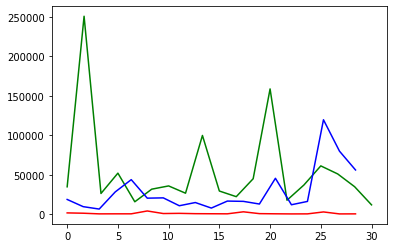

In [ ]:
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'b')
plt.plot(x3, y3, 'r')
#plt.ylim(0,300000)
plt.show()

In [ ]:
matriceAD = np.zeros((len(y1),2))
matriceMCI = np.zeros((len(y2),2))
matriceHC = np.zeros((len(y3),2))


In [ ]:
matriceADHC = np.zeros((len(y1)+len(y3),2))
matriceMCIHC = np.zeros((len(y2)+len(y3),2))
matriceADMCI = np.zeros((len(y1)+len(y2),2))
matriceCASEHC = np.zeros((len(y2)+len(y3)+len(y1),2))

In [ ]:
for i in range(len(y1)):
      matriceAD[i,0]=y1[i]
      matriceAD[i,1]=1

In [ ]:
for i in range(len(y2)):
      matriceMCI[i,0]=y2[i]
      matriceMCI[i,1]=2

In [ ]:
for i in range(len(y3)):
      matriceHC[i,0]=y3[i]
      matriceHC[i,1]=3

In [ ]:
AD=pd.DataFrame(matriceAD)
HC=pd.DataFrame(matriceHC)
MCI=pd.DataFrame(matriceMCI)

In [ ]:
ADHC=AD.copy()
ADHC=ADHC.append(HC,ignore_index=True)

In [ ]:
ADMCI=AD.copy()
ADMCI=ADMCI.append(MCI,ignore_index=True)

In [ ]:
MCIHC=MCI.copy()
MCIHC=MCIHC.append(HC,ignore_index=True)

In [ ]:
CASEHC=AD.copy()
CASEHC=CASEHC.append(MCI,ignore_index=True)
CASEHC=CASEHC.append(HC,ignore_index=True)

#### Caso1 AD vs HCF

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()

In [ ]:
y = np.where(y == 1, 1, 0)

In [ ]:
X,y

(array([ 34752.15675047, 250913.15759798,  26295.66208837,  52052.5169674 ,
         15788.76457173,  31743.30742218,  35868.97396914,  26651.99738345,
         99833.61600971,  29406.92524743,  22258.25588666,  44981.64061625,
        158799.32615801,  17739.10797974,  37017.97618986,  61262.35387063,
         51043.09870588,  34873.18484116,  11863.85528898,   1676.48183003,
          1280.1394041 ,    456.56049086,    503.75386828,    504.11432031,
          4126.21475617,    874.17253023,   1106.48289038,    702.65669485,
           599.19490764,    509.5651957 ,   3066.70349052,    744.97025478,
           534.68060178,    392.33466682,    448.45455426,   2896.23171167,
           394.16219149,    456.04616464]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
df=ADHC.loc[:,0]

X = df.to_numpy()

Y = ADHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso1=X_train
X_test_caso1=X_test
y_train_caso1=y_train
y_test_caso1=y_test



In [ ]:
X_train_caso1=X_train_caso1.reshape(-1,1)
X_test_caso1=X_test_caso1.reshape(-1,1)
y_train_caso1=y_train_caso1.reshape(-1,1)
y_test_caso1=y_test_caso1.reshape(-1,1)


In [ ]:
tuning_albero_decisione(1,5)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.5s finished


In [ ]:
tuning_SVM(1,5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(1,10)

In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
#tuning_SVM_CV(1,10)

In [ ]:
#validazione_incrociata_kfold(1,10,1)

In [ ]:
#validazione_incrociata_kfold(1,10,2)

In [ ]:
#validazione_incrociata_score(1,10,1)

In [ ]:
#validazione_incrociata_score(1,10,2)

In [ ]:
#prova_pipeline(1,2)

In [ ]:
tuning_KNN(1,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(1,5)

In [ ]:
tuning_LR(1,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.967
I migliori parametri trvati sono :
 {'C': 0.001, 'penalty': 'l2'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[6 0]
 [0 6]]
Accuratezza Test: 100.000
Precisione  Test: 0.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 0.000


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_foresta(1,5)

#### Caso2 AD vs MCI

In [ ]:

df=ADMCI.loc[:,0]

X = df.to_numpy()

Y = ADMCI.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

#pca = PCA(n_components=5)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso2=X_train
X_test_caso2=X_test
y_train_caso2=y_train
y_test_caso2=y_test

In [ ]:
X_train_caso2=X_train_caso2.reshape(-1,1)
X_test_caso2=X_test_caso2.reshape(-1,1)
y_train_caso2=y_train_caso2.reshape(-1,1)
y_test_caso2=y_test_caso2.reshape(-1,1)

In [ ]:
tuning_albero_decisione(2,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.700
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      0.17      0.29         6

    accuracy                           0.58        12
   macro avg       0.77      0.58      0.50        12
weighted avg       0.77      0.58      0.50        12

[[6 0]
 [5 1]]
Accuratezza Test: 58.000
Precisione  Test: 54.000
Sensitività Test: 100.000
Specificità Test: 16.000
F1 score    Test: 70.000


[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.4s finished


In [ ]:
tuning_SVM(2,5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.0min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.413
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.67      1.00      0.80         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

[[3 3]
 [0 6]]
Accuratezza Test: 75.000
Precisione  Test: 100.000
Sensitività Test: 50.000
Specificità Test: 100.000
F1 score    Test: 66.000


In [ ]:
#tuning_foresta(2,10)

In [ ]:
#tuning_albero_decisione_CV(2,10)

In [ ]:
#tuning_SVM_CV(2,10)

In [ ]:
#validazione_incrociata_kfold(2,10,1)

In [ ]:
#validazione_incrociata_kfold(2,10,2)

In [ ]:
#validazione_incrociata_score(2,10,1)

In [ ]:
#validazione_incrociata_score(2,10,2)

In [ ]:
#prova_pipeline(2,2)

In [ ]:
#exec_trad(2,1)

In [ ]:
#exec_trad(2,2)

In [ ]:
tuning_KNN(2,5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.700
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.583
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      0.17      0.29         6

    accuracy                           0.58        12
   macro avg       0.77      0.58      0.50        12
weighted avg       0.77      0.58      0.50        12

[[6 0]
 [5 1]]
Accuratezza Test: 58.000
Precisione  Test: 54.000
Sensitività Test: 100.000
Specificità Test: 16.000
F1 score    Test: 70.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(2,10)

In [ ]:
#tuning_LR(2,5)

<br>
<br>

<br>
<br>

In [ ]:
#tuning_foresta(2,10)

#### Caso3 MCI vs HCF

In [ ]:

df=MCIHC.loc[:,0]

X = df.to_numpy()

Y = MCIHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 2, 1, 0)

#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso3=X_train
X_test_caso3=X_test
y_train_caso3=y_train
y_test_caso3=y_test

In [ ]:
X_train_caso3=X_train_caso3.reshape(-1,1)
X_test_caso3=X_test_caso3.reshape(-1,1)
y_train_caso3=y_train_caso3.reshape(-1,1)
y_test_caso3=y_test_caso3.reshape(-1,1)

In [ ]:
tuning_albero_decisione(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 1908 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.2s finished


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000


In [ ]:
tuning_SVM(3,10)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'kernel': 'linear'}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_albero_decisione_CV(3,10)

In [ ]:
#tuning_SVM_CV(3,10)

In [ ]:
#validazione_incrociata_kfold(3,10,1)

In [ ]:
#validazione_incrociata_kfold(3,10,2)

In [ ]:
#validazione_incrociata_score(3,10,1)

In [ ]:
#validazione_incrociata_score(3,10,2)

In [ ]:
#prova_pipeline(3,2)

In [ ]:
#exec_trad(3,1)

In [ ]:
#exec_trad(3,2)

In [ ]:
tuning_KNN(3,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.917
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

[[6 0]
 [1 5]]
Accuratezza Test: 91.000
Precisione  Test: 85.000
Sensitività Test: 100.000
Specificità Test: 83.000
F1 score    Test: 91.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(3,10)

In [ ]:
#tuning_LR(3,5)

In [ ]:
#tuning_foresta(3,10)

#### Caso4 CASE vs HCF

In [ ]:
df=CASEHC.loc[:,0]

X = df.to_numpy()

Y = CASEHC.loc[:,1]
y = Y.to_numpy()
y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso4=X_train
X_test_caso4=X_test
y_train_caso4=y_train
y_test_caso4=y_test

In [ ]:
X_train_caso4=X_train_caso4.reshape(-1,1)
X_test_caso4=X_test_caso4.reshape(-1,1)
y_train_caso4=y_train_caso4.reshape(-1,1)
y_test_caso4=y_test_caso4.reshape(-1,1)

In [ ]:
tuning_albero_decisione(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.971
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.4s finished


In [ ]:
tuning_SVM(4,5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.971
{'kernel': 'linear'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_albero_decisione_CV(4,10)

In [ ]:
#tuning_SVM_CV(4,10)

In [ ]:
#validazione_incrociata_kfold(4,10,1)

In [ ]:
#validazione_incrociata_kfold(4,10,2)

In [ ]:
#validazione_incrociata_score(4,10,1)

In [ ]:
#validazione_incrociata_score(4,10,2)

In [ ]:
#prova_pipeline(4,2)

In [ ]:
#exec_trad(4,1)

In [ ]:
#exec_trad(4,2)

In [ ]:
tuning_KNN(4,5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 1.000
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[12  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#tuning_MP(4,10)

In [ ]:
#tuning_LR(4,5)

In [ ]:
#tuning_foresta(4,10)

<br>
<br>